In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
train = pd.read_csv("inputs/train.csv")
test = pd.read_csv("inputs/test.csv")
submission_sample = pd.read_csv("inputs/sample_submission.csv")

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [185]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB


In [120]:
train.isna().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [121]:
test.isna().sum()

date_time            0
deg_C                0
relative_humidity    0
absolute_humidity    0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
dtype: int64

In [122]:
# No missing values in either train or test dataset. No need to impute anything

In [123]:
train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

## TimeSeries continuity checks

In [ ]:
# Training set is a timeseries data from Mar-2010 to Jan-2011   (nothing on Jan & Feb)
# Testing set is from Jan-2011 to Mar-2011   (mild overlap on Mar but Jan-Feb is going to be without a baseline)

In [211]:
print(train["date_time"].apply(lambda x: 1 if "/" in x else 0).sum())
print(test["date_time"].apply(lambda x: 1 if "/" in x else 0).sum())

0
0


In [212]:
print(train["date_time"].apply(len).value_counts())
print()
print(test["date_time"].apply(len).value_counts())

19    7111
Name: date_time, dtype: int64

19    2247
Name: date_time, dtype: int64


In [213]:
train_dates = pd.to_datetime(train["date_time"])
deltas = []
for i in range(1,train_dates.shape[0]):
    deltas.append(train_dates[i]-train_dates[i-1])
print(pd.Series(deltas).value_counts())
print(train.shape[0]-1)  # num of deltas
print("The train time series is having a constant delta throughout")

0 days 01:00:00    7110
dtype: int64
7110
The train time series is having a constant delta throughout


In [214]:
del_time = train_dates[1]-train_dates[0]
mock_train_dates = pd.Series([train_dates[0]+(i)*del_time for i in range(train_dates.shape[0])])
print((mock_train_dates != train_dates).sum())
print("It can be concluded that the train timeseries is complete from start to end with a constant delta of 1 hour")

0
It can be concluded that the train timeseries is complete from start to end with a constant delta of 1 hour


In [215]:
test_dates = pd.to_datetime(test["date_time"])
deltas = []
for i in range(1,test_dates.shape[0]):
    deltas.append(test_dates[i]-test_dates[i-1])
print(pd.Series(deltas).value_counts())
print(test.shape[0]-1)  # num of deltas
print("The test time series is having a constant delta throughout")

0 days 01:00:00    2246
dtype: int64
2246
The test time series is having a constant delta throughout


In [216]:
del_time = test_dates[1]-test_dates[0]
mock_test_dates = pd.Series([test_dates[0]+(i)*del_time for i in range(test_dates.shape[0])])
print((mock_test_dates != test_dates).sum())
print("It can be concluded that the test timeseries is complete from start to end with a constant delta of 1 hour")

0
It can be concluded that the test timeseries is complete from start to end with a constant delta of 1 hour


In [217]:
# Try pd.date_range for equivalent building of mock timeseries to compare continuity

In [218]:
train["date_time"] = train_dates
test["date_time"] = test_dates

In [220]:
for dataset in [train, test]:
    dataset["day"]   = dataset["date_time"].apply(lambda x: x.day)
    dataset["month"] = dataset["date_time"].apply(lambda x: x.month)
    dataset["hour"]  = dataset["date_time"].apply(lambda x: x.hour)
    dataset["day_of_week"]  = dataset["date_time"].apply(lambda x: x.day_of_week)
    datset["day_of_week"] = datset.index.day_of_week.astype(int)    
    # ignoring year since there is only (<)one year of data to train and probably would not be a useful to model

In [221]:
train = train.set_index("date_time")
test  = test.set_index("date_time")

In [222]:
targets = train[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
train.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],axis=1, inplace=True)
targets.columns = ['carbon','benzene', 'nitrogen']

In [226]:
# End of basic pre-processing of raw data. Now onto EDA

# Exploratory Data Analysis

In [227]:
train.head()

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

                     sensor_2  sensor_3  sensor_4  sensor_5  day  month  hour  
date_time                                                                      
2010-03-10 18:00:00    1087.8    1056.0    1742.8    1293.4   10      3    18  
2010-03-10 19:00:00     888.2    1197.5    1449.9    1010.9   10      3    19  
2010-03-10 20:00:00     929.6    1060.2    1586.1    1117.0   10      3    20  
2010-03-10 21:00:00     929.0    1102.9    1536.5    1263.2   10      3    21  
2010-03-10 22:00:00     852.7    1180.9    1415.5    1132.2   10      3    22

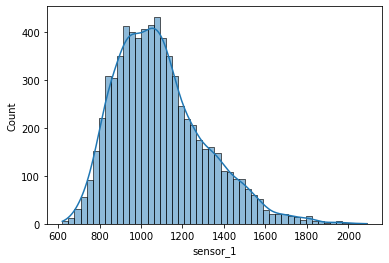

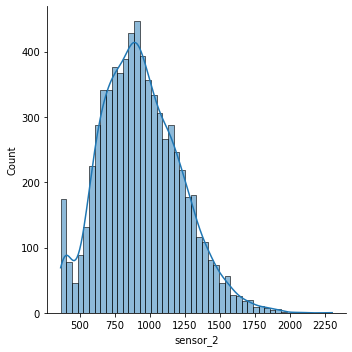

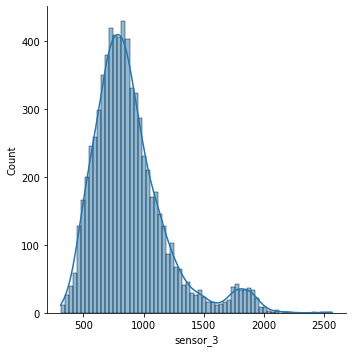

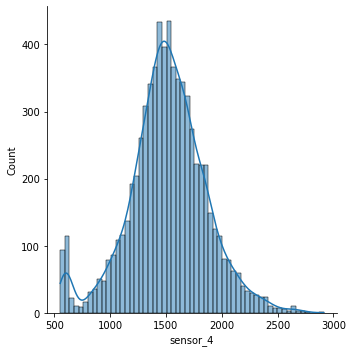

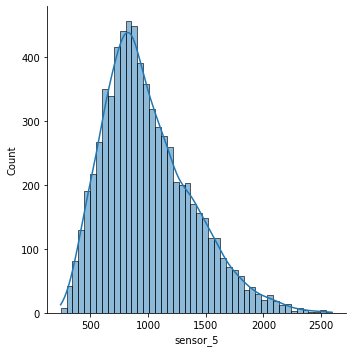

In [319]:
sns.histplot(train["sensor_1"], kde=True)
sns.displot(train["sensor_2"], kde=True)
sns.displot(train["sensor_3"], kde=True)
sns.displot(train["sensor_4"], kde=True)
sns.displot(train["sensor_5"], kde=True)

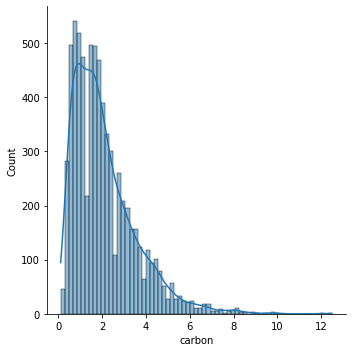

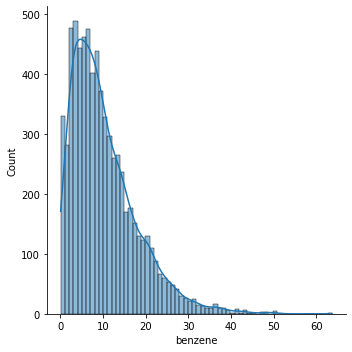

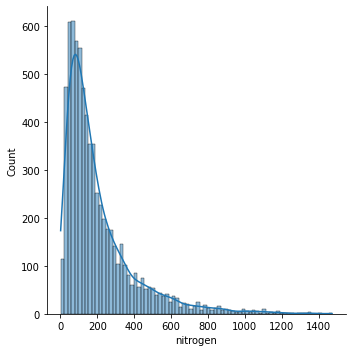

In [321]:
sns.displot(targets["carbon"], kde=True)
sns.displot(targets["benzene"], kde=True)
sns.displot(targets["nitrogen"], kde=True)

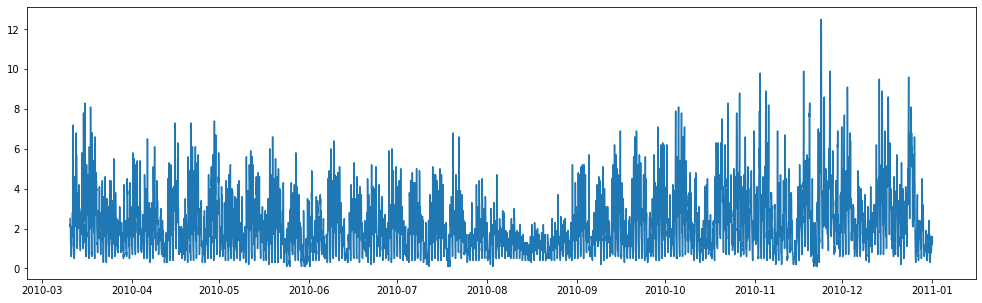

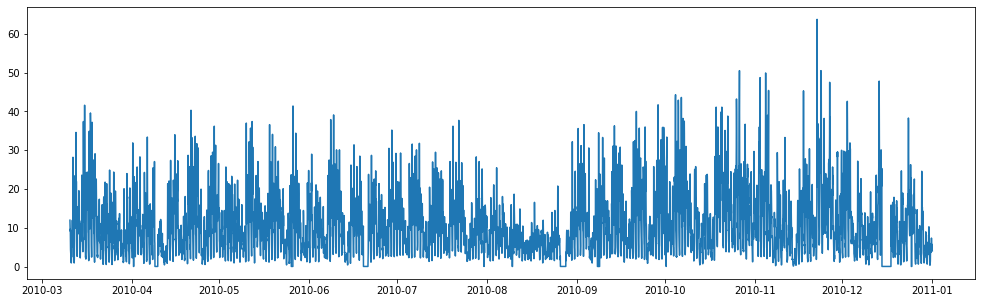

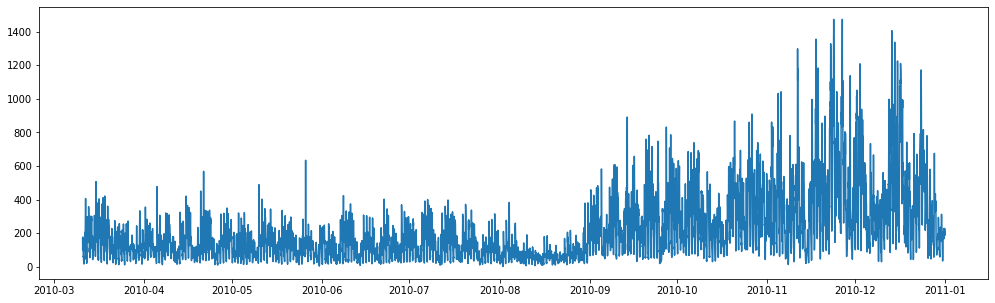

In [259]:
plt.figure(1,(17,5))
plt.plot(targets["carbon"])
plt.figure(2,(17,5))
plt.plot(targets["benzene"])
plt.figure(3,(17,5))
plt.plot(targets["nitrogen"])

In [494]:
targets.mean()      # these could be an estimate for the submission file

carbon        2.086219
benzene      10.237083
nitrogen    204.066784
dtype: float64

In [ ]:
# Note: These could also be used as a substitute whenever you're predicted value for a target goes negative

In [496]:
targets.median()

carbon        1.7
benzene       8.5
nitrogen    141.0
dtype: float64

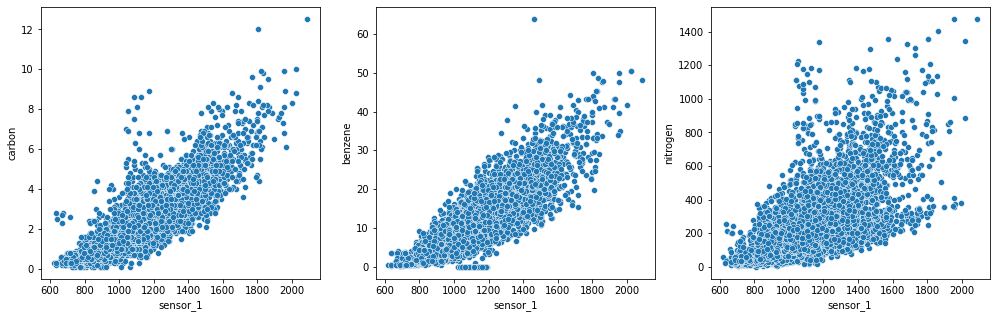

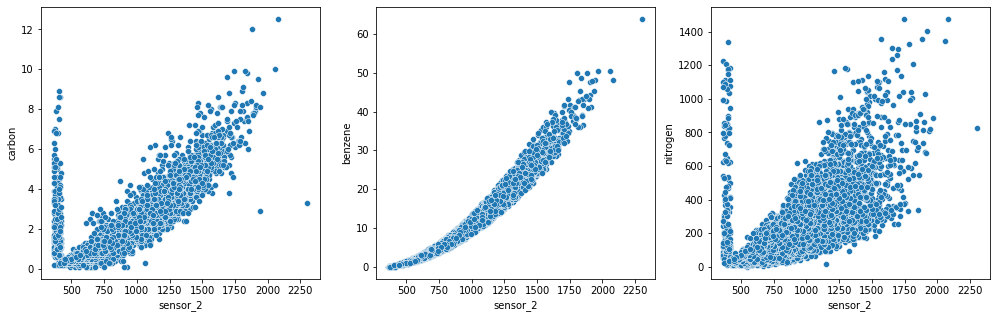

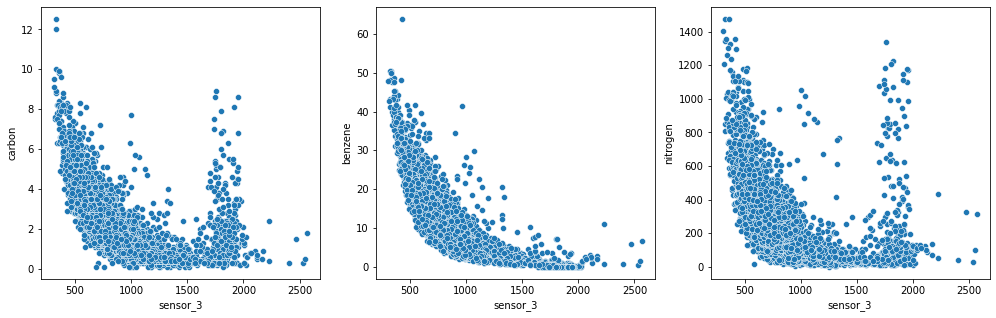

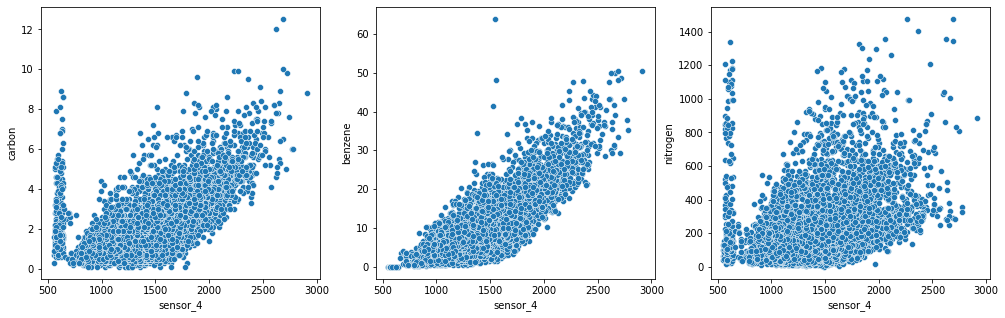

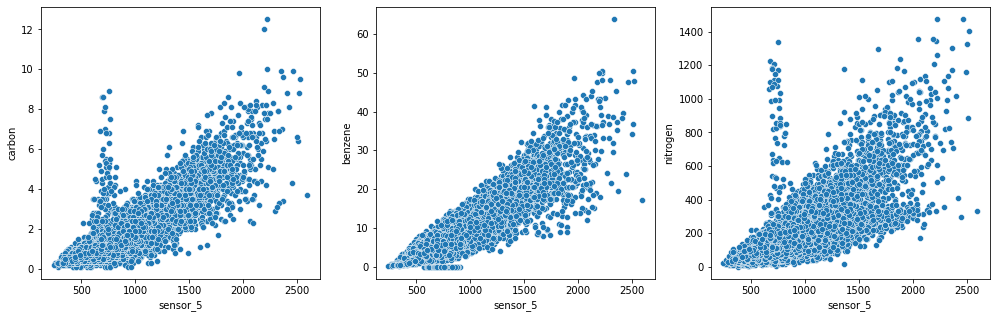

In [272]:
for i in range(1,6):
    plt.figure(i,figsize=(17,5))
    plt.subplot(1,3,1)
    sns.scatterplot(x=train["sensor_"+str(i)],y=targets["carbon"])
    plt.subplot(1,3,2)
    sns.scatterplot(x=train["sensor_"+str(i)],y=targets["benzene"])
    plt.subplot(1,3,3)
    sns.scatterplot(x=train["sensor_"+str(i)],y=targets["nitrogen"])

Prelim observations: Targets-vs-Sensors:

    1. Benzene is well behaved (tighter spread, outlier-free) across all 5 sensors - better than carbon & nitrogen
    2. carbon is better then nitrogen, barring the outliers in both. Spread is larger in for nitrogen.
    3. Sensor-1 is failry linear for all three targets. Can still consider some transformations
    Barring outliers for below observations
    4. Sensor-2 shows more non-linear/polynomial behaviour for all targets
    5. Sensor-3 has some sort of inverse law going on for all three targets
    6. Sensor-4 has the widest spread for all thre targets, still fairly linear enough
    7. Sensor-5 has non-linear/polynomial influence on carbon and nitrogen.

For something like a linear regression (of appropriate feature & feature transforms), we are going to be affected
significantly by the outliers that can be spotted in these plots. Must consider removing or treating them separately
after determining some baseline performance of a simple linear model

<AxesSubplot:xlabel='sensor_1', ylabel='benzene'>

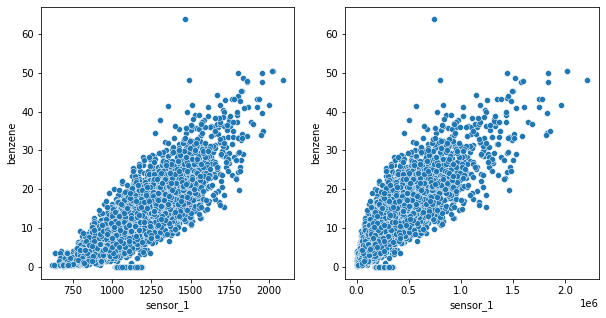

In [679]:
plt.figure(1,(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=train["sensor_1"],y=targets["benzene"])
plt.subplot(1,2,2)
sns.scatterplot(x=(train["sensor_1"]-600)**2, y=targets["benzene"])

<AxesSubplot:xlabel='sensor_2', ylabel='nitrogen'>

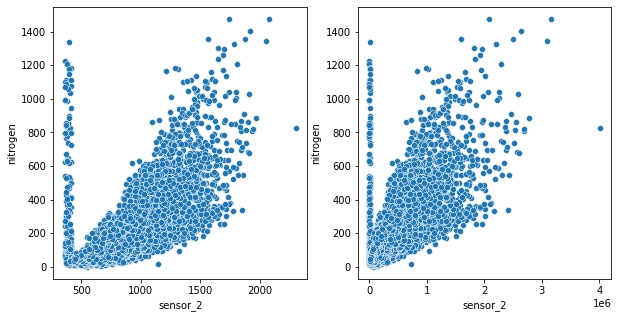

In [658]:
plt.figure(1,(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=train["sensor_2"],y=targets["nitrogen"])
plt.subplot(1,2,2)
sns.scatterplot(x=(train["sensor_2"]-300)**2, y=targets["nitrogen"])

<AxesSubplot:xlabel='sensor_3', ylabel='carbon'>

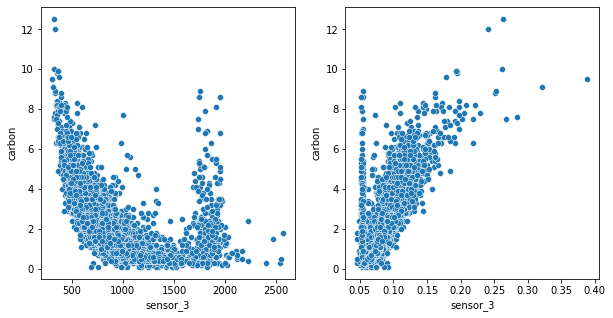

In [675]:
plt.figure(1,(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=train["sensor_3"],y=targets["carbon"])
plt.subplot(1,2,2)
sns.scatterplot(x=(train["sensor_3"]-300)**-0.4, y=targets["carbon"])

<AxesSubplot:xlabel='sensor_4', ylabel='nitrogen'>

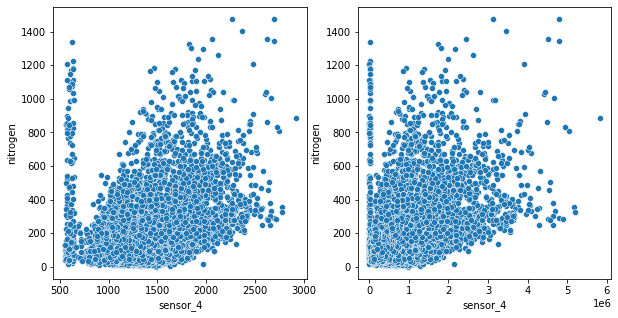

In [695]:
plt.figure(1,(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=train["sensor_4"],y=targets["nitrogen"])
plt.subplot(1,2,2)
sns.scatterplot(x=(train["sensor_4"]-500)**2, y=targets["nitrogen"])

<AxesSubplot:xlabel='sensor_5', ylabel='carbon'>

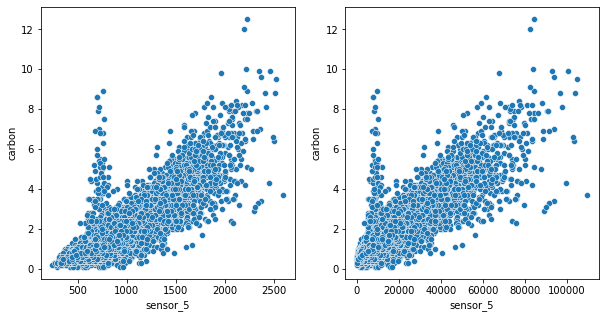

In [706]:
plt.figure(1,(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=train["sensor_5"],y=targets["carbon"])
plt.subplot(1,2,2)
sns.scatterplot(x=(train["sensor_5"]-300)**1.5, y=targets["carbon"])

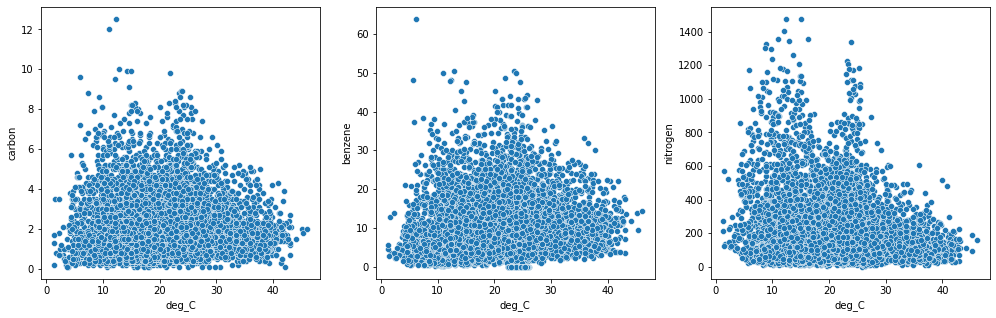

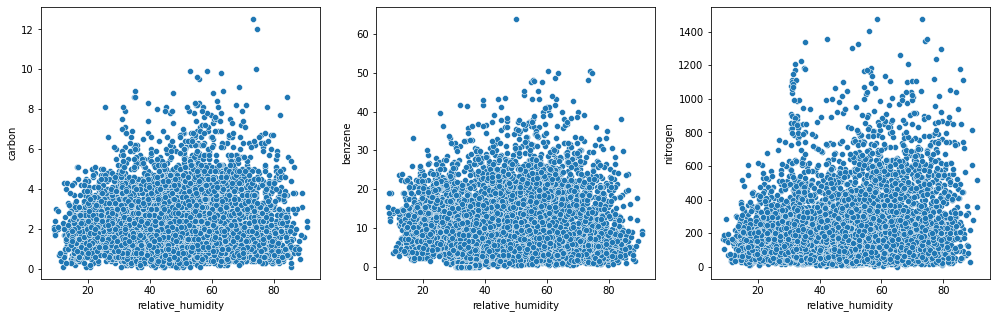

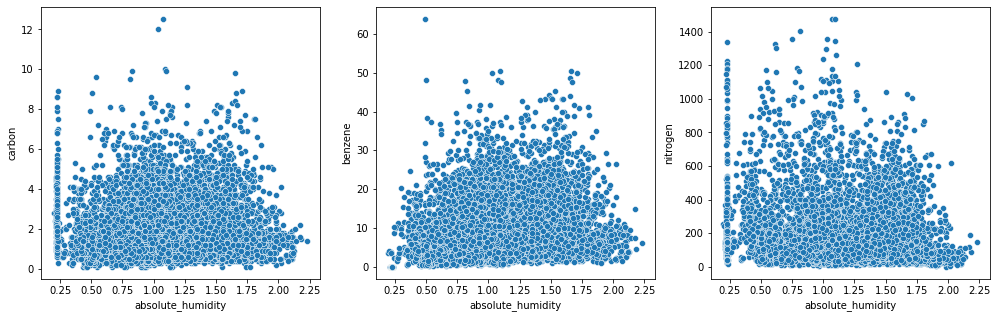

In [304]:
for i, weather in enumerate(["deg_C", "relative_humidity", "absolute_humidity"]):
    plt.figure(i,figsize=(17,5))
    plt.subplot(1,3,1)
    sns.scatterplot(x=train[weather],y=targets["carbon"])
    plt.subplot(1,3,2)
    sns.scatterplot(x=train[weather],y=targets["benzene"])
    plt.subplot(1,3,3)
    sns.scatterplot(x=train[weather],y=targets["nitrogen"])

Observations:
    1. There doesnt seem to be a strong case for a basic linear-like relationship between the targets and 
    these weather features
    2. If we can do a good transform on the sensor variables and perform a linear regression, we might be fair to 
    expect a p-value that rejects (atleast) a linear relationship of the targets with these features
    3. It's entirely possible that more complex models like xgboost or neuralnets may capture some complex 
    relationship of these features with the targets

In [769]:
for datset in [train, test]:
    datset["sensor_1mod"] = (datset["sensor_1"]-600)**2
    datset["sensor_2mod"] = (datset["sensor_2"]-300)**2
    datset["sensor_3mod"] = (datset["sensor_3"]-300)**-0.4
    datset["sensor_4mod"] = (datset["sensor_4"]-500)**2
    datset["sensor_5mod"] = (datset["sensor_5"]-200)**1.5
#     datset["day_of_week"] = datset.index.day_of_week.astype(int)

<AxesSubplot:xlabel='day_of_week', ylabel='nitrogen'>

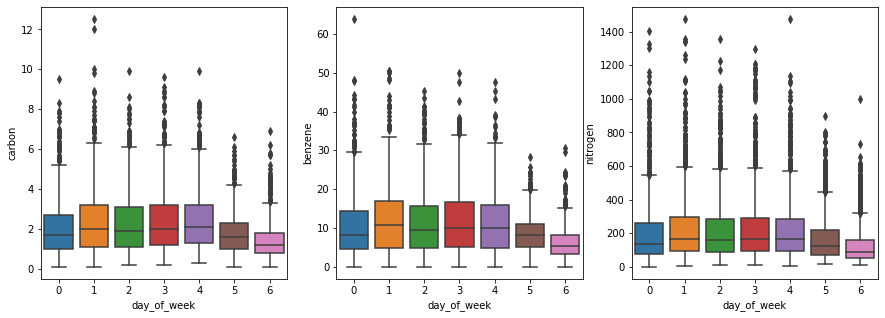

In [770]:
plt.figure(1,(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train["day_of_week"],y=targets["carbon"])
plt.subplot(1,3,2)
sns.boxplot(x=train["day_of_week"],y=targets["benzene"])
plt.subplot(1,3,3)
sns.boxplot(x=train["day_of_week"],y=targets["nitrogen"])

In [ ]:
# As expected "day of the week" plays some role in increasing the targets such that (5,6) < 0 < (1-4)

# 0-Monday, 6-Sunday

# It's possible that lower weekend traffic is responsible for lesser pollution

## Setting up Cross-Validation

In [322]:
from sklearn.model_selection import train_test_split

In [771]:
X_train, X_val, y_train, y_val = train_test_split(train, targets, test_size=0.2, random_state=2003)

In [772]:
def kaggle_score(actual_values, predicted_values):
#     ## check if pandas or numpy array
#     if "pandas" in str(type(actual)):
#         actual_values = actual.values
#     else:
#         actual_values = actual
        
#     if "pandas" in str(type(predicted)):
#         predicted_values = predicted.values
#     else:
#         predicted_values = predicted
    N = actual_values.shape[0]
    squared = (np.log(1+predicted_values) - np.log(1+actual_values))**2
    return np.sqrt(squared.sum(axis=0)/N)

# Baselining with a simple Linear Regression : Part-1

In [484]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

In [773]:
linreg = LinearRegression().fit(X_train,y_train)

In [774]:
print("R-squared value")
linreg.score(X_train,y_train), linreg.score(X_val,y_val)

R-squared value


(0.8863501933368934, 0.8805224731704473)

In [684]:
# print("R-squared value")
# linreg.score(X_train,y_train), linreg.score(X_val,y_val)

R-squared value


(0.8738061263060786, 0.8688325053189908)

In [520]:
# print("R-squared value")
# linreg.score(X_train,y_train), linreg.score(X_val,y_val)

R-squared value


(0.8635220473581685, 0.8556183790219284)

In [775]:
print(np.sqrt(mean_squared_error(y_train, linreg.predict(X_train), multioutput="raw_values")))
print(np.sqrt(mean_squared_error(y_val, linreg.predict(X_val), multioutput="raw_values")))

[ 0.5   1.14 85.28]
[ 0.53  1.17 90.86]


In [685]:
# print(np.sqrt(mean_squared_error(y_train, linreg.predict(X_train), multioutput="raw_values")))
# print(np.sqrt(mean_squared_error(y_val, linreg.predict(X_val), multioutput="raw_values")))

[ 0.52  1.16 91.05]
[ 0.55  1.17 96.86]


In [540]:
# print(np.sqrt(mean_squared_error(y_train, linreg.predict(X_train), multioutput="raw_values")))
# print(np.sqrt(mean_squared_error(y_val, linreg.predict(X_val), multioutput="raw_values")))

[ 0.54  1.51 92.36]
[ 0.56  1.65 99.  ]


In [686]:
Tmeans = targets.mean().values

In [776]:
pred_train = linreg.predict(X_train)
pred_train = np.where(pred_train<0, Tmeans, pred_train)

In [777]:
pred_val= linreg.predict(X_val)
pred_val = np.where(pred_val<0, Tmeans, pred_val)

In [778]:
print(np.sqrt(mean_squared_log_error(y_train, pred_train, multioutput="raw_values")))
print(np.sqrt(mean_squared_log_error(y_val, pred_val, multioutput="raw_values")))

[0.16 0.32 0.66]
[0.15 0.29 0.67]


In [548]:
print(kaggle_score(y_train, pred_train))
print()
print(kaggle_score(y_val, pred_val))

carbon      0.179109
benzene     0.442352
nitrogen    0.772300
dtype: float64

carbon      0.178430
benzene     0.437385
nitrogen    0.765858
dtype: float64


In [779]:
kaggle_score(y_train, pred_train).mean(), kaggle_score(y_val, pred_val).mean()

(0.378893689100315, 0.3694570805822281)

In [794]:
test_predictions = linreg.predict(test[train.columns])
test_predictions = np.where(test_predictions<0, Tmeans, test_predictions)

In [796]:
test_predictions

array([[  0.99,   3.53, 204.07],
       [  1.64,   6.7 ,  90.77],
       [  1.17,   5.73, 204.07],
       ...,
       [  2.14,  11.38, 162.27],
       [  1.59,   8.83,  46.22],
       [  1.93,  10.73,  99.72]])

In [798]:
col_headers = ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
result = pd.DataFrame(test_predictions, index=test.index).reset_index()
result.columns = col_headers
result.to_csv("submissions/3_improved_linreg_transforms_dayofweek.csv", header=True, index=False)
result

date_time  target_carbon_monoxide  target_benzene  \
0    2011-01-01 00:00:00                0.986247        3.527863   
1    2011-01-01 01:00:00                1.640527        6.701868   
2    2011-01-01 02:00:00                1.168364        5.727714   
3    2011-01-01 03:00:00                1.342443        6.618309   
4    2011-01-01 04:00:00                0.975800        4.560730   
...                  ...                     ...             ...   
2242 2011-04-04 10:00:00                2.632771       12.559536   
2243 2011-04-04 11:00:00                2.033859        9.547175   
2244 2011-04-04 12:00:00                2.138011       11.382980   
2245 2011-04-04 13:00:00                1.591660        8.825433   
2246 2011-04-04 14:00:00                1.932764       10.729294   

      target_nitrogen_oxides  
0                 204.066784  
1                  90.774091  
2                 204.066784  
3                  14.980829  
4                 204.066784  
...                      ...  
2242              285.029956  
2243              157.727311  
2244              162.266757  
2245               46.218752  
2246               99.716627  

[2247 rows x 4 columns]

## Using Moving Average Subtraction to model Errors

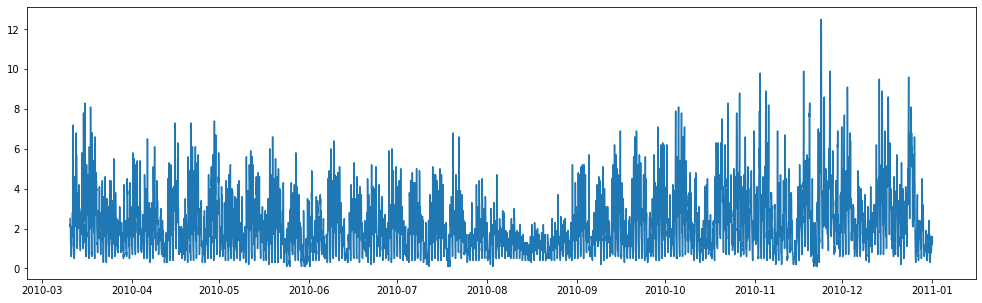

In [812]:
plt.figure(1,(17,5))
plt.plot(targets["carbon"])
# sns.lineplot(targets["carbon"].rolling(window=5).mean())

In [808]:
targets["carbon"].rolling(window=5).mean()

date_time
2010-03-10 18:00:00     NaN
2010-03-10 19:00:00     NaN
2010-03-10 20:00:00     NaN
2010-03-10 21:00:00     NaN
2010-03-10 22:00:00    2.10
                       ... 
2010-12-31 20:00:00    1.30
2010-12-31 21:00:00    1.36
2010-12-31 22:00:00    1.40
2010-12-31 23:00:00    1.40
2011-01-01 00:00:00    1.44
Name: carbon, Length: 7111, dtype: float64

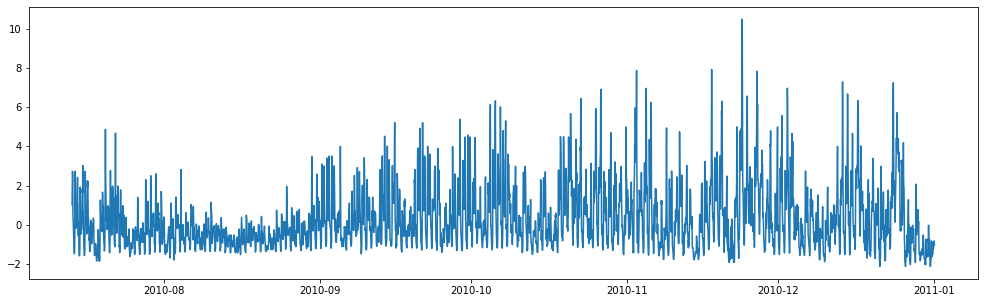

In [849]:
plt.figure(1,(17,5))
plt.plot((targets["carbon"]-targets["carbon"].rolling(window=3000).mean()).iloc[:])

In [842]:
(targets["carbon"]-targets["carbon"].rolling(window=500).mean()).iloc[1000]

0.9314

### Are the features and targets continuous or categorical?

In [947]:
pd.concat([train.describe().T, train.nunique()], axis=1 )

count          mean            std          min  \
deg_C              7111.0  2.087803e+01       7.937917     1.300000   
relative_humidity  7111.0  4.756100e+01      17.398731     8.900000   
absolute_humidity  7111.0  1.110309e+00       0.398950     0.198800   
sensor_1           7111.0  1.091572e+03     218.537554   620.300000   
sensor_2           7111.0  9.380650e+02     281.978988   364.000000   
sensor_3           7111.0  8.839033e+02     310.456355   310.600000   
sensor_4           7111.0  1.513238e+03     350.180310   552.900000   
sensor_5           7111.0  9.983356e+02     381.537695   242.700000   
day                7111.0  1.614471e+01       8.758778     1.000000   
month              7111.0  7.647166e+00       2.802293     1.000000   
hour               7111.0  1.150598e+01       6.925721     0.000000   
sensor_3mod        7111.0  8.475839e-02       0.020779     0.045477   
sensor_1mod        7111.0  2.893951e+05  261635.283077   412.090000   
sensor_2mod        7111.0  4.866279e+05  408367.313356  4096.000000   
sensor_4mod        7111.0  1.149261e+06  723708.355697  2798.410000   
sensor_5mod        7111.0  2.444503e+04   17393.727162   279.024162   
day_of_week        7111.0  3.002813e+00       1.993588     0.000000   

                             25%           50%           75%           max  \
deg_C                  14.900000  2.070000e+01  2.580000e+01  4.610000e+01   
relative_humidity      33.700000  4.730000e+01  6.080000e+01  9.080000e+01   
absolute_humidity       0.855900  1.083500e+00  1.404150e+00  2.231000e+00   
sensor_1              930.250000  1.060500e+03  1.215800e+03  2.088300e+03   
sensor_2              734.900000  9.142000e+02  1.124100e+03  2.302600e+03   
sensor_3              681.050000  8.278000e+02  1.008850e+03  2.567400e+03   
sensor_4             1320.350000  1.513100e+03  1.720400e+03  2.913800e+03   
sensor_5              722.850000  9.287000e+02  1.224700e+03  2.594600e+03   
day                     9.000000  1.600000e+01  2.400000e+01  3.100000e+01   
month                   5.000000  8.000000e+00  1.000000e+01  1.200000e+01   
hour                    6.000000  1.200000e+01  1.800000e+01  2.300000e+01   
sensor_3mod             0.072407  8.147273e-02  9.281266e-02  3.889356e-01   
sensor_1mod        109065.065000  2.120602e+05  3.792096e+05  2.215037e+06   
sensor_2mod        189138.050000  3.772416e+05  6.791408e+05  4.010407e+06   
sensor_4mod        672974.145000  1.026372e+06  1.489376e+06  5.826430e+06   
sensor_5mod         11955.442912  1.967085e+04  3.280161e+04  1.171789e+05   
day_of_week             1.000000  3.000000e+00  5.000000e+00  6.000000e+00   

                      0  
deg_C               408  
relative_humidity   762  
absolute_humidity  5451  
sensor_1           3882  
sensor_2           4254  
sensor_3           4251  
sensor_4           4655  
sensor_5           4839  
day                  31  
month                11  
hour                 24  
sensor_3mod        4251  
sensor_1mod        3882  
sensor_2mod        4254  
sensor_4mod        4655  
sensor_5mod        4839  
day_of_week           7

In [948]:
pd.concat([targets.describe().T, targets.nunique()], axis=1 )

count        mean         std  min    25%    50%    75%     max  \
carbon    7111.0    2.086219    1.447109  0.1   1.00    1.7    2.8    12.5   
benzene   7111.0   10.237083    7.694426  0.1   4.50    8.5   14.2    63.7   
nitrogen  7111.0  204.066784  193.927723  1.9  76.45  141.0  260.0  1472.3   

             0  
carbon      95  
benzene    405  
nitrogen  3268

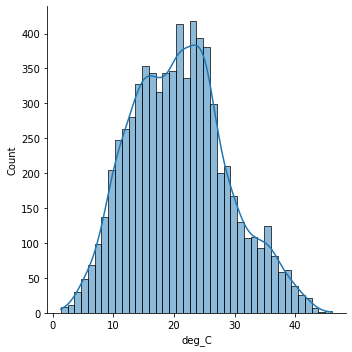

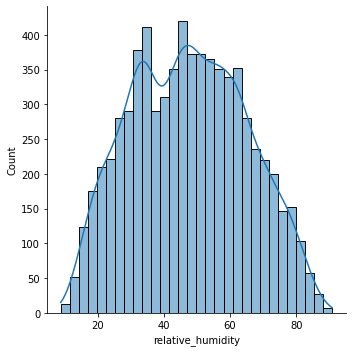

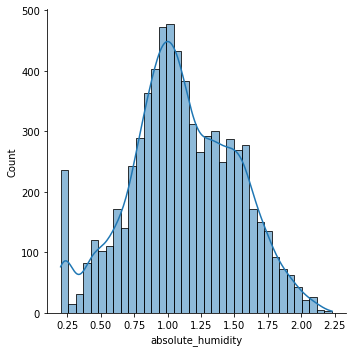

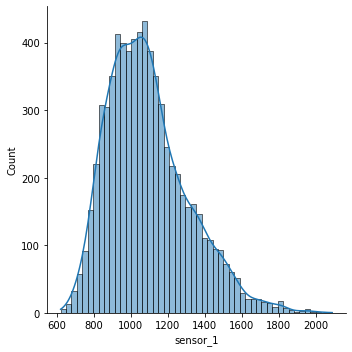

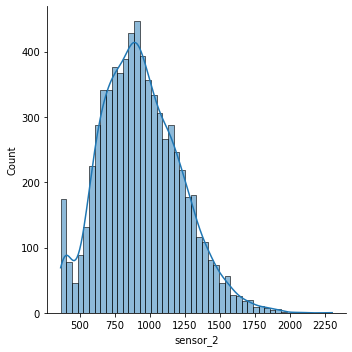

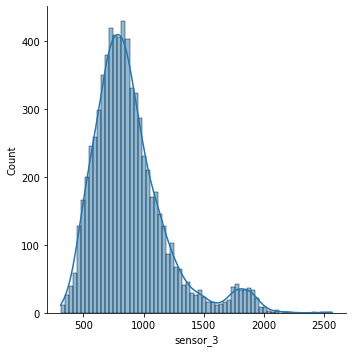

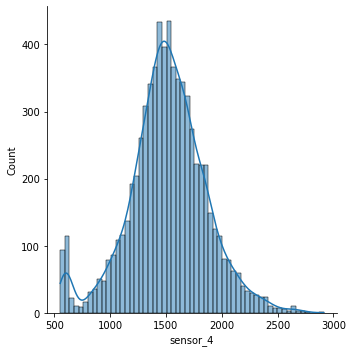

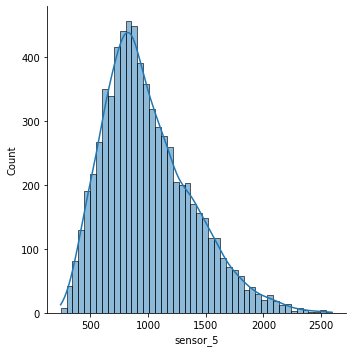

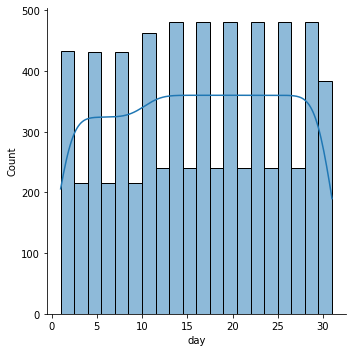

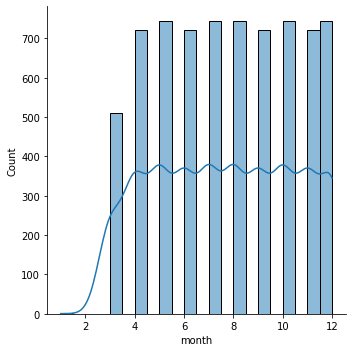

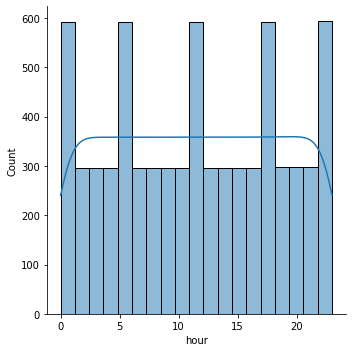

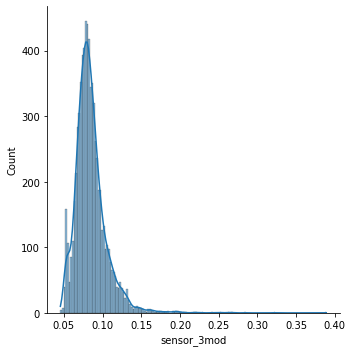

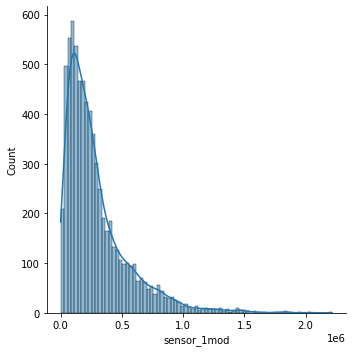

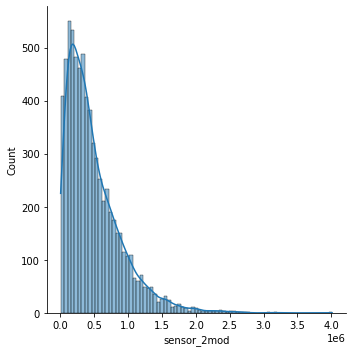

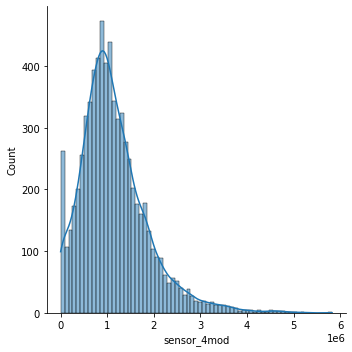

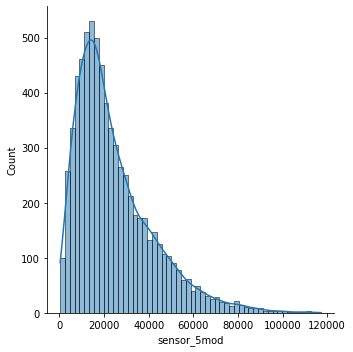

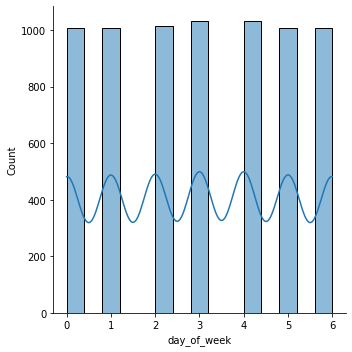

In [961]:
for feat in train.columns:
    sns.displot(x=train[feat], kde=True)

<Figure size 720x360 with 0 Axes>

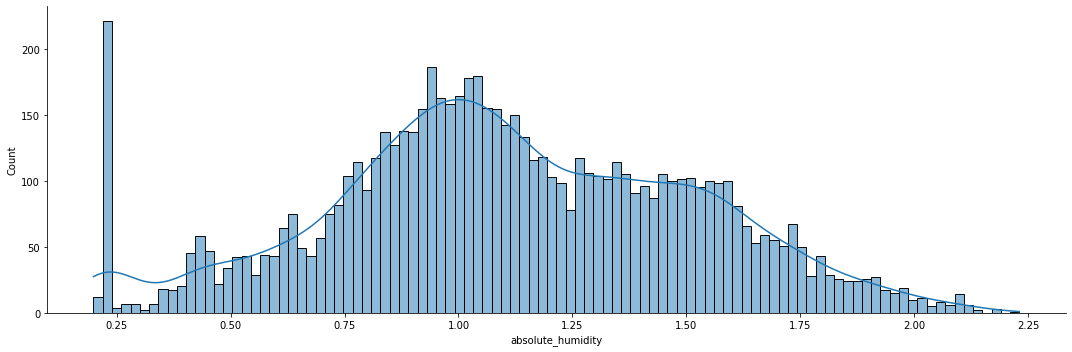

In [982]:
# The histogram of absolute_humidity looks interesting.
# It has an unusual peak in the first bin. Similar to the outlier streaks seen in the targets-vs-sensor plots
# This could be some sort of lower-bounding of the sensor itself. Worth investigating
plt.figure(1,(10,5))
sns.displot(x=train["absolute_humidity"], kde=True, bins=100,aspect=3)

<AxesSubplot:xlabel='absolute_humidity'>

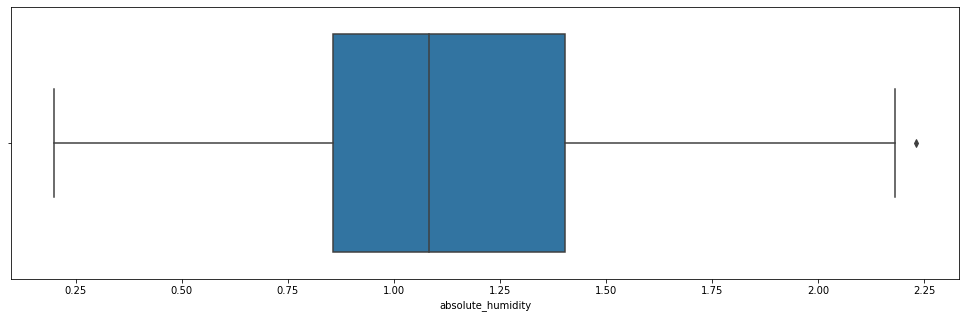

In [963]:
plt.figure(1,(17,5))
sns.boxplot(x=train["absolute_humidity"])

<AxesSubplot:xlabel='nitrogen'>

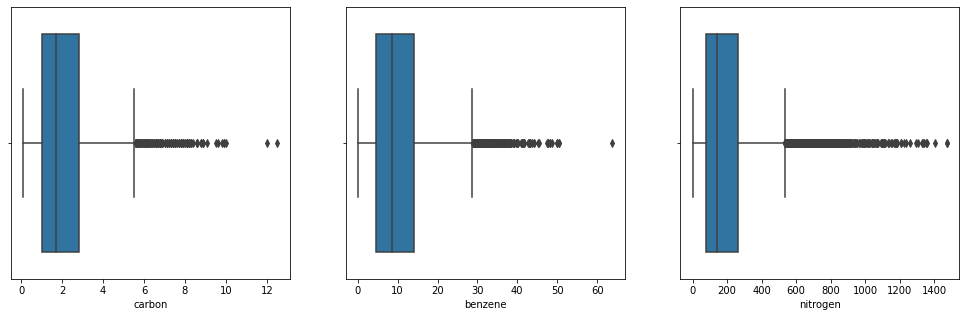

In [955]:
plt.figure(1,(17,5))
plt.subplot(1,3,1)
sns.boxplot(x=targets["carbon"])
plt.subplot(1,3,2)
sns.boxplot(x=targets["benzene"])
plt.subplot(1,3,3)
sns.boxplot(x=targets["nitrogen"])

In [962]:
# It can be concluded that all the features and target variables can be modelled as continuous variables
# Only the time-related features {day, day_of_week, month, hour} need to be treated as discrete features.
# Most features/targets have periodic behaviour with the above time-features.

## Seasonality/Periodicity in targets and features

<AxesSubplot:xlabel='hour', ylabel='nitrogen'>

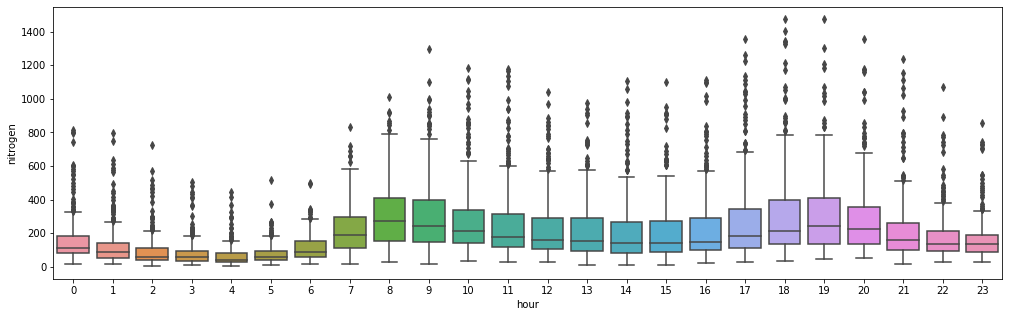

In [871]:
plt.figure(1,(17,5))
sns.boxplot(x=train["hour"], y=targets["nitrogen"])

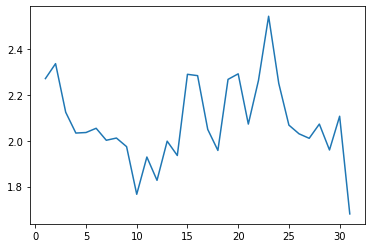

In [931]:
plt.plot(targets.groupby(by=targets.index.day)["carbon"].mean())

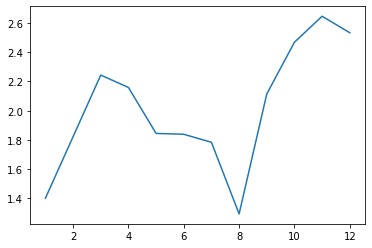

In [927]:
plt.plot(targets.groupby(by=targets.index.month)["carbon"].mean())

<AxesSubplot:xlabel='hour', ylabel='deg_C'>

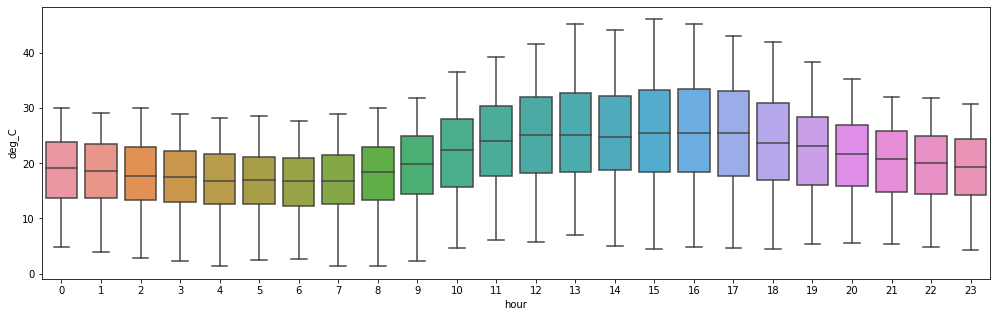

In [954]:
plt.figure(1,(17,5))
sns.boxplot(x=train["hour"], y=train["deg_C"])

<AxesSubplot:xlabel='hour', ylabel='deg_C'>

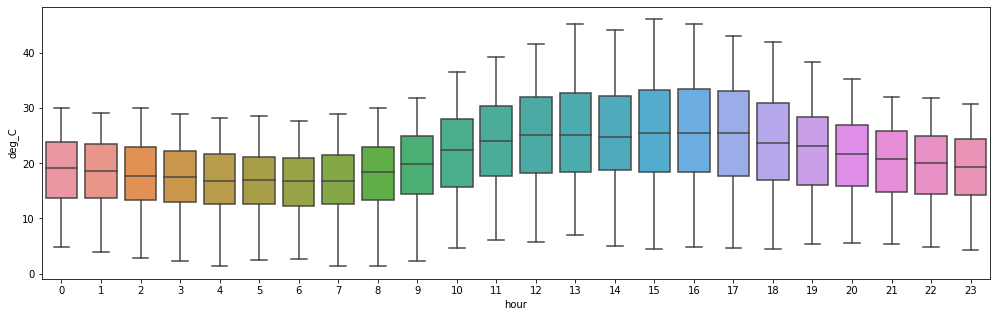

In [949]:
plt.figure(1,(17,5))
sns.boxplot(x=train["month"], y=train["deg_C"])

<AxesSubplot:xlabel='month', ylabel='relative_humidity'>

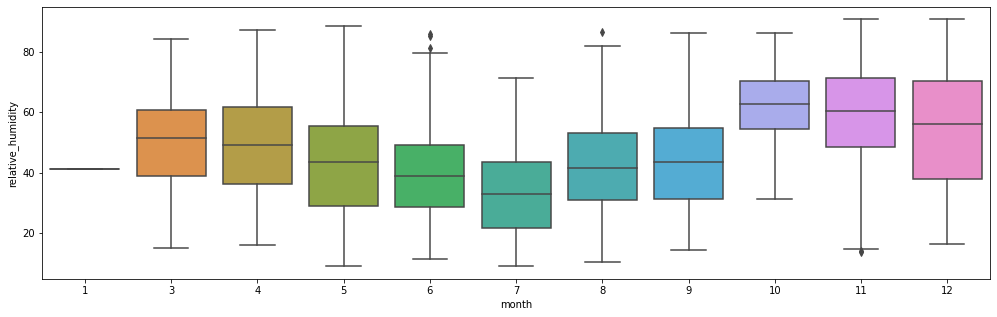

In [876]:
plt.figure(1,(17,5))
sns.boxplot(x=train["month"], y=train["relative_humidity"])

<AxesSubplot:xlabel='month', ylabel='absolute_humidity'>

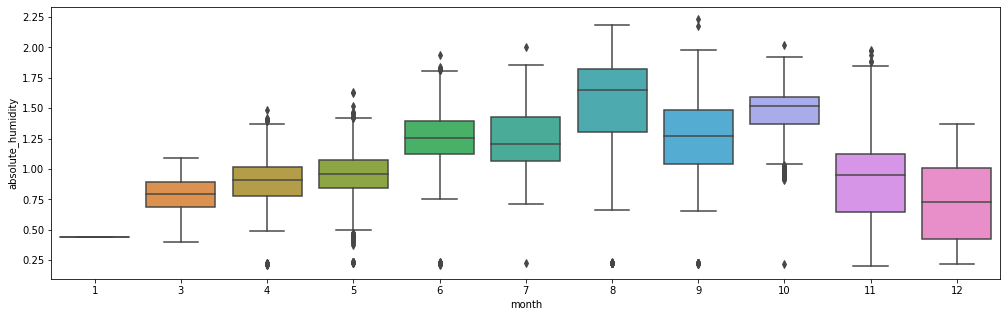

In [877]:
plt.figure(1,(17,5))
sns.boxplot(x=train["month"], y=train["absolute_humidity"])

<AxesSubplot:xlabel='month', ylabel='sensor_5'>

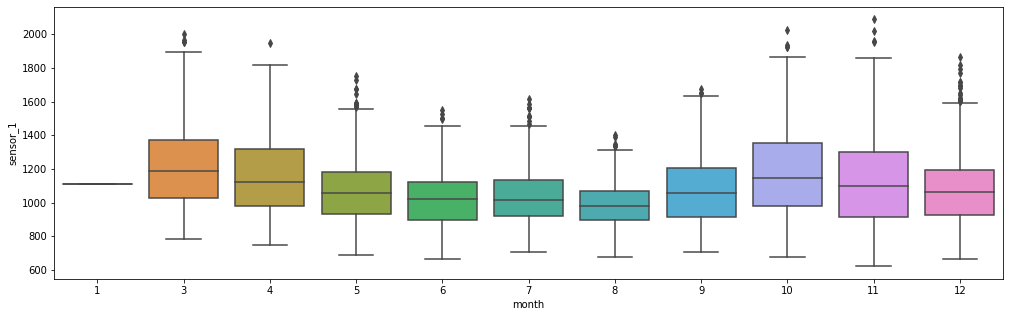

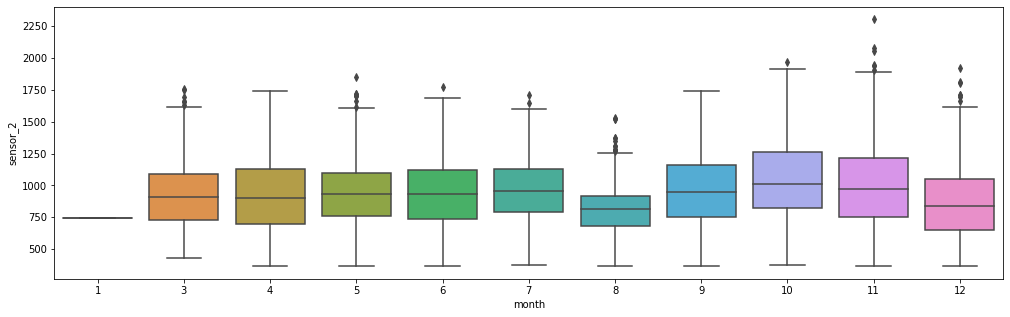

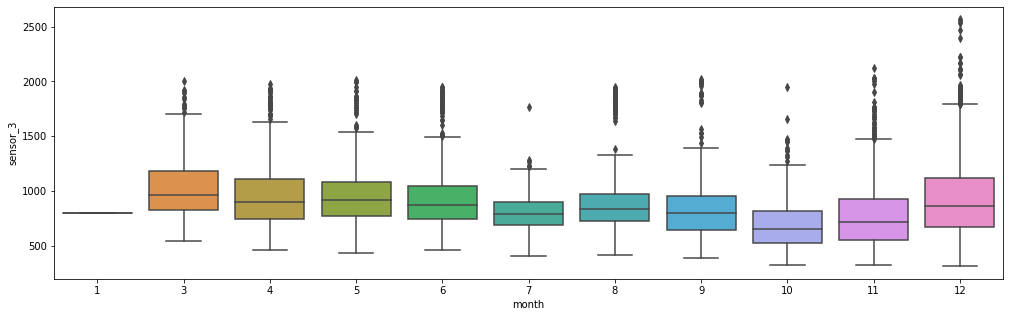

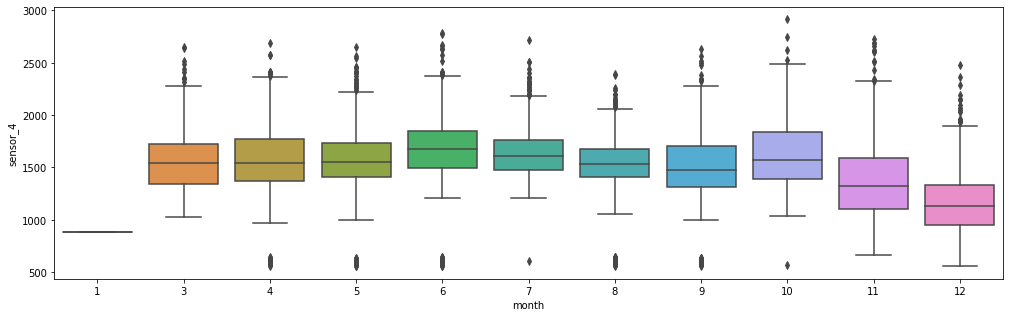

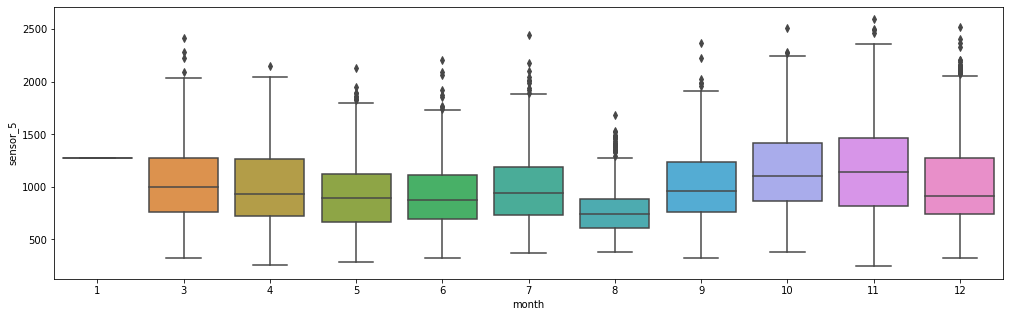

In [884]:
plt.figure(1,(17,5))
sns.boxplot(x=train["month"], y=train["sensor_1"])
plt.figure(2,(17,5))
sns.boxplot(x=train["month"], y=train["sensor_2"])
plt.figure(3,(17,5))
sns.boxplot(x=train["month"], y=train["sensor_3"])
plt.figure(4,(17,5))
sns.boxplot(x=train["month"], y=train["sensor_4"])
plt.figure(5,(17,5))
sns.boxplot(x=train["month"], y=train["sensor_5"])

20.87803403178175 7.937916707032572
-0.000358649789028481 0.9828327801102128


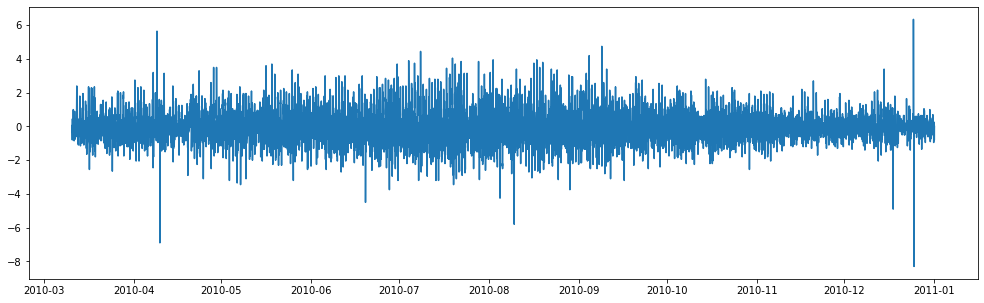

In [1148]:
plt.figure(1,(17,5))
temp = train["deg_C"] - train["deg_C"].rolling(window=2).mean()
print(train["deg_C"].mean(), train["deg_C"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

47.56100407818873 17.398730721568253
-0.000330520393801048 2.733876420358919


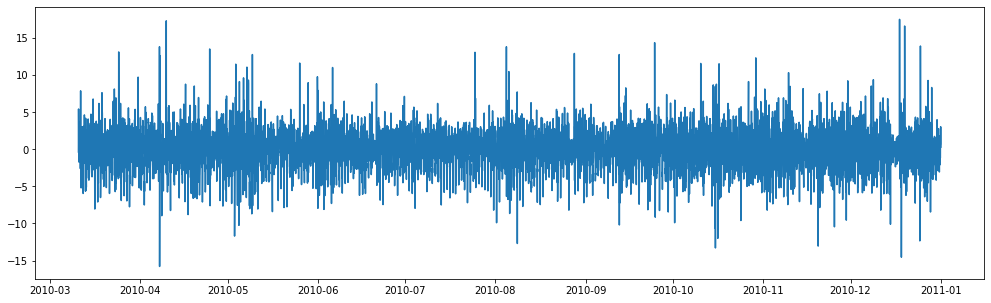

In [1149]:
plt.figure(1,(17,5))
temp = train["relative_humidity"] - train["relative_humidity"].rolling(window=2).mean()
print(train["relative_humidity"].mean(), train["relative_humidity"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

1.1103087610743918 0.3989500846401012
-2.2524613221260954e-05 0.03809753772635037


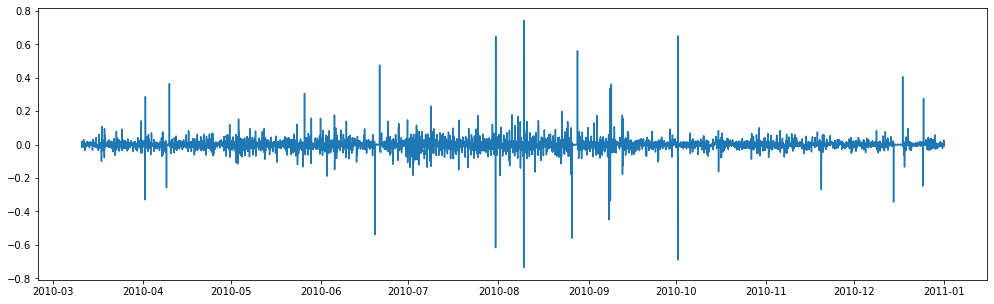

In [1147]:
plt.figure(1,(17,5))
temp = train["absolute_humidity"] - train["absolute_humidity"].rolling(window=2).mean()
print(train["absolute_humidity"].mean(), train["absolute_humidity"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

1091.5720995640556 218.53755417071667
-0.019578059070866342 61.21376596356986


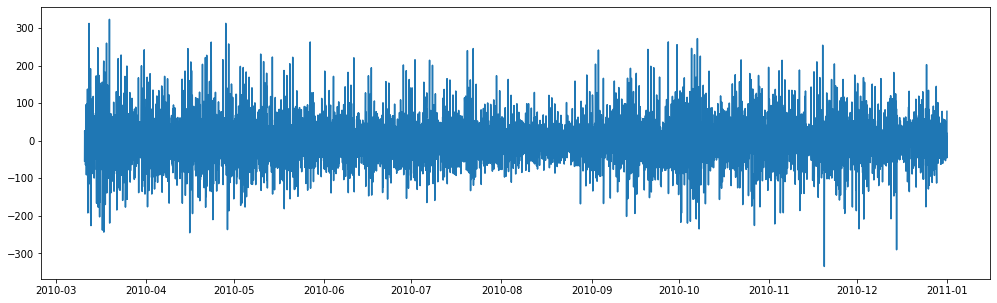

In [1146]:
plt.figure(1,(17,5))
temp = train["sensor_1"] - train["sensor_1"].rolling(window=2).mean()
print(train["sensor_1"].mean(), train["sensor_1"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

998.335564618197 381.53769538644906
-0.0014275668056942896 94.21896794598234


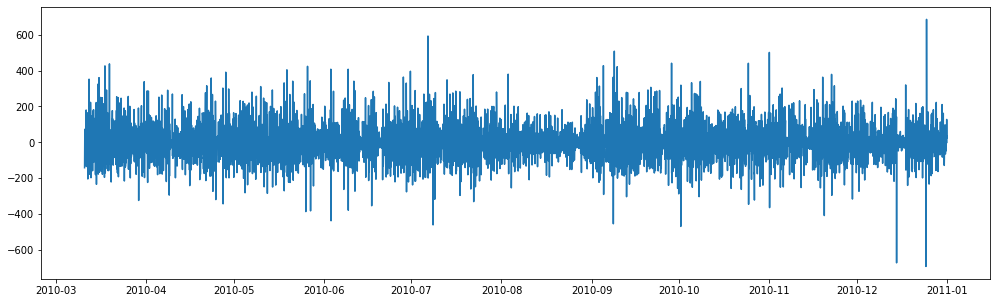

In [1145]:
plt.figure(1,(17,5))
temp = train["sensor_5"] - train["sensor_5"].rolling(window=2).mean()
print(train["sensor_5"].mean(), train["sensor_5"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

289395.075485867 261635.28307716793
-25.373164557432542 79758.17317092675


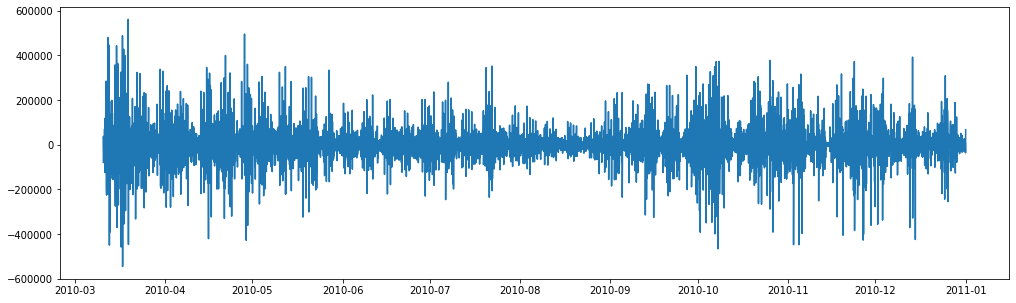

In [1160]:
plt.figure(1,(17,5))
df = train["sensor_1mod"]
temp =  df - df.rolling(window=2).mean()
print(df.mean(), df.std())
print(temp.mean(), temp.std())
plt.plot(temp)

-7.735583684468169e-05 0.4155825840365461


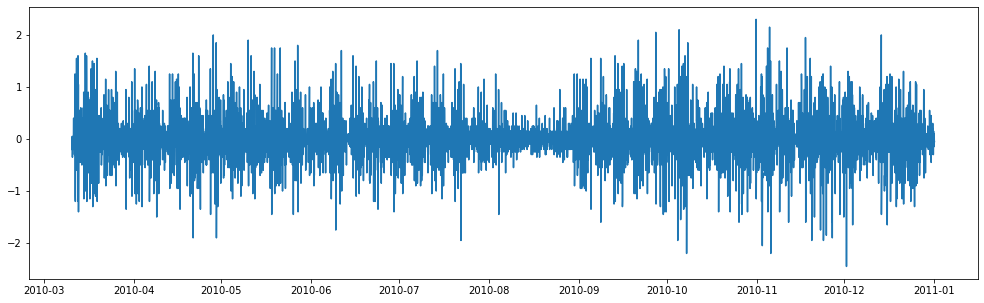

In [1136]:
plt.figure(1,(17,5))
temp = targets["carbon"] - targets["carbon"].rolling(window=2).mean()
print(temp.mean(), temp.std())
plt.plot(temp)

10.237083391927998 7.6944257236347955
-0.0005555555555490831 2.22631309806778


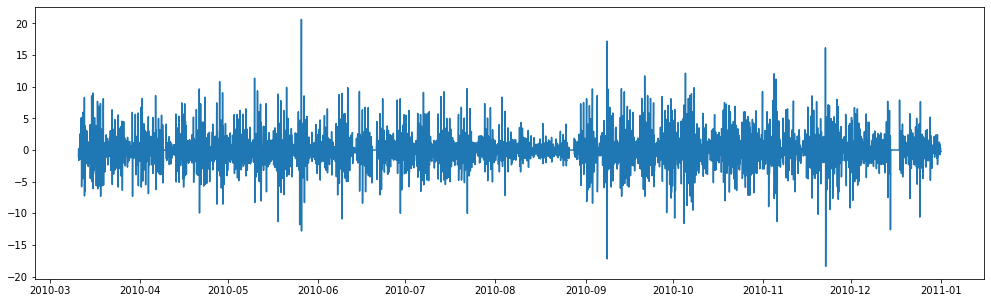

In [1143]:
plt.figure(1,(17,5))
temp = targets["benzene"] - targets["benzene"].rolling(window=2).mean()
print(targets["benzene"].mean(), targets["benzene"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

204.06678385599773 193.92772337942333
0.0013220815751099186 41.50486775481346


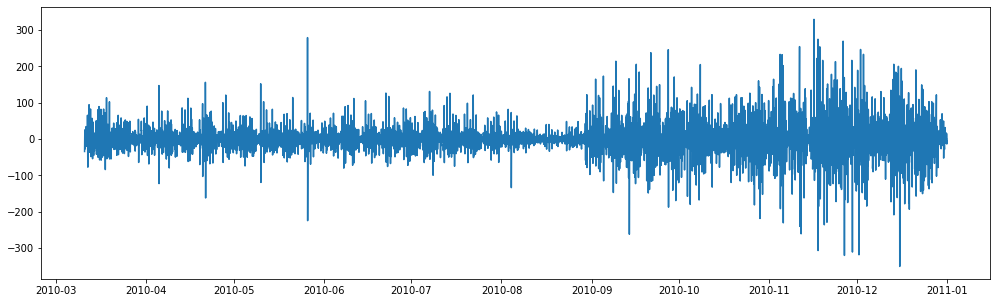

In [1144]:
plt.figure(1,(17,5))
temp = targets["nitrogen"] - targets["nitrogen"].rolling(window=2).mean()
print(targets["nitrogen"].mean(), targets["nitrogen"].std())
print(temp.mean(), temp.std())
plt.plot(temp)

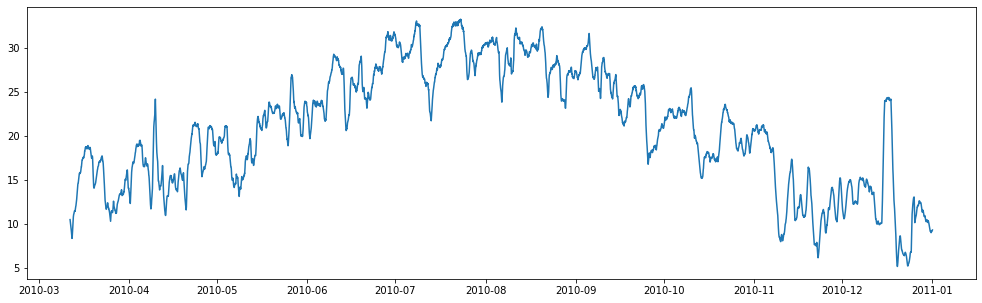

In [1087]:
plt.figure(1,(17,5))
plt.plot(train["deg_C"].rolling(window=24).mean())

In [1102]:
# This spike in 24-hour-mean temperature could also be related to the outliers we saw in target-vs-sensors.

In [1009]:
train.describe().T

count          mean            std          min  \
deg_C              7111.0  2.087803e+01       7.937917     1.300000   
relative_humidity  7111.0  4.756100e+01      17.398731     8.900000   
absolute_humidity  7111.0  1.110309e+00       0.398950     0.198800   
sensor_1           7111.0  1.091572e+03     218.537554   620.300000   
sensor_2           7111.0  9.380650e+02     281.978988   364.000000   
sensor_3           7111.0  8.839033e+02     310.456355   310.600000   
sensor_4           7111.0  1.513238e+03     350.180310   552.900000   
sensor_5           7111.0  9.983356e+02     381.537695   242.700000   
day                7111.0  1.614471e+01       8.758778     1.000000   
month              7111.0  7.647166e+00       2.802293     1.000000   
hour               7111.0  1.150598e+01       6.925721     0.000000   
sensor_3mod        7111.0  8.475839e-02       0.020779     0.045477   
sensor_1mod        7111.0  2.893951e+05  261635.283077   412.090000   
sensor_2mod        7111.0  4.866279e+05  408367.313356  4096.000000   
sensor_4mod        7111.0  1.149261e+06  723708.355697  2798.410000   
sensor_5mod        7111.0  2.444503e+04   17393.727162   279.024162   
day_of_week        7111.0  3.002813e+00       1.993588     0.000000   

                             25%           50%           75%           max  
deg_C                  14.900000  2.070000e+01  2.580000e+01  4.610000e+01  
relative_humidity      33.700000  4.730000e+01  6.080000e+01  9.080000e+01  
absolute_humidity       0.855900  1.083500e+00  1.404150e+00  2.231000e+00  
sensor_1              930.250000  1.060500e+03  1.215800e+03  2.088300e+03  
sensor_2              734.900000  9.142000e+02  1.124100e+03  2.302600e+03  
sensor_3              681.050000  8.278000e+02  1.008850e+03  2.567400e+03  
sensor_4             1320.350000  1.513100e+03  1.720400e+03  2.913800e+03  
sensor_5              722.850000  9.287000e+02  1.224700e+03  2.594600e+03  
day                     9.000000  1.600000e+01  2.400000e+01  3.100000e+01  
month                   5.000000  8.000000e+00  1.000000e+01  1.200000e+01  
hour                    6.000000  1.200000e+01  1.800000e+01  2.300000e+01  
sensor_3mod             0.072407  8.147273e-02  9.281266e-02  3.889356e-01  
sensor_1mod        109065.065000  2.120602e+05  3.792096e+05  2.215037e+06  
sensor_2mod        189138.050000  3.772416e+05  6.791408e+05  4.010407e+06  
sensor_4mod        672974.145000  1.026372e+06  1.489376e+06  5.826430e+06  
sensor_5mod         11955.442912  1.967085e+04  3.280161e+04  1.171789e+05  
day_of_week             1.000000  3.000000e+00  5.000000e+00  6.000000e+00

In [1008]:
test.describe().T

count           mean            std          min  \
deg_C              2247.0      10.808144       6.444497    -1.800000   
relative_humidity  2247.0      51.031242      16.665047     9.800000   
absolute_humidity  2247.0       0.627053       0.266588     0.184700   
sensor_1           2247.0    1106.534490     205.341455   665.900000   
sensor_2           2247.0     836.459769     272.816585   356.200000   
sensor_3           2247.0     828.321495     339.511779   320.100000   
sensor_4           2247.0    1104.850601     293.112225   523.400000   
sensor_5           2247.0    1029.851535     434.863287   218.800000   
day                2247.0      15.022697       8.916698     1.000000   
month              2247.0       2.077437       0.900808     1.000000   
hour               2247.0      11.469960       6.919320     0.000000   
sensor_1mod        2247.0  298723.538077  244915.294341  4342.810000   
sensor_2mod        2247.0  362184.848896  338927.067599  3158.440000   
sensor_3mod        2247.0       0.090852       0.024621     0.051333   
sensor_4mod        2247.0  451720.790303  407621.580117   547.560000   
sensor_5mod        2247.0   26357.493709   19783.600181    81.514858   
day_of_week        2247.0       3.033378       2.021754     0.000000   

                             25%            50%            75%           max  
deg_C                   5.600000       9.800000      14.200000  3.090000e+01  
relative_humidity      36.900000      50.600000      63.550000  8.880000e+01  
absolute_humidity       0.413350       0.596400       0.804950  1.393000e+00  
sensor_1              951.500000    1080.400000    1222.100000  1.882900e+03  
sensor_2              640.700000     800.800000    1016.100000  1.776100e+03  
sensor_3              597.050000     757.100000     944.950000  1.975000e+03  
sensor_4              899.450000    1076.200000    1288.350000  2.211400e+03  
sensor_5              688.550000     973.100000    1324.000000  2.593800e+03  
day                     7.000000      15.000000      23.000000  3.100000e+01  
month                   1.000000       2.000000       3.000000  4.000000e+00  
hour                    5.000000      11.000000      17.000000  2.300000e+01  
sensor_1mod        123552.260000  230784.160000  387008.410000  1.645832e+06  
sensor_2mod        116076.490000  250800.640000  512799.210000  2.178871e+06  
sensor_3mod             0.075195       0.086297       0.102534  3.011075e-01  
sensor_4mod        159560.325000  332006.440000  621495.845000  2.928890e+06  
sensor_5mod         10798.503393   21495.794912   37683.346773  1.171202e+05  
day_of_week             1.000000       3.000000       5.000000  6.000000e+00

In [1103]:
# Notice that the deg_C in test set starts from a sub-zero value while our trainset starts from a positive value.

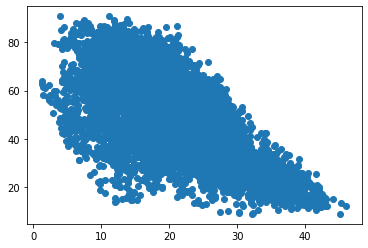

In [1011]:
plt.scatter(train["deg_C"], train["relative_humidity"])

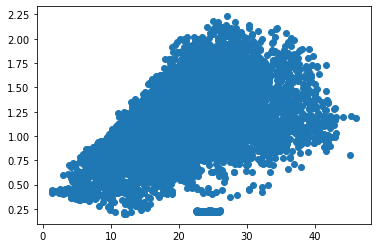

In [1012]:
plt.scatter(train["deg_C"], train["absolute_humidity"])

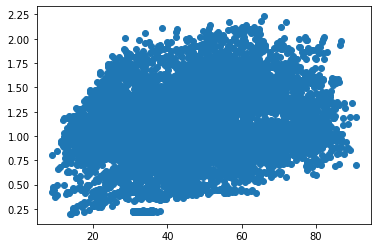

In [1013]:
plt.scatter(train["relative_humidity"], train["absolute_humidity"])

In [1022]:
relhum_model = LinearRegression().fit(X_train[["absolute_humidity","relative_humidity"]], X_train[["deg_C"]])

In [1023]:
relhum_model.score(X_train[["absolute_humidity","relative_humidity"]], X_train[["deg_C"]])

0.8442266279968562

In [1024]:
relhum_model.score(X_val[["absolute_humidity","relative_humidity"]], X_val[["deg_C"]])

0.8474215268049302

In [ ]:
r-squared value for predicting weather respectively using the other two
81.76434656805428, 82.17304274983421 rel
73.67282737372742, 73.92598978514529 abs
84.42266279968562, 84.74215268049302 deg

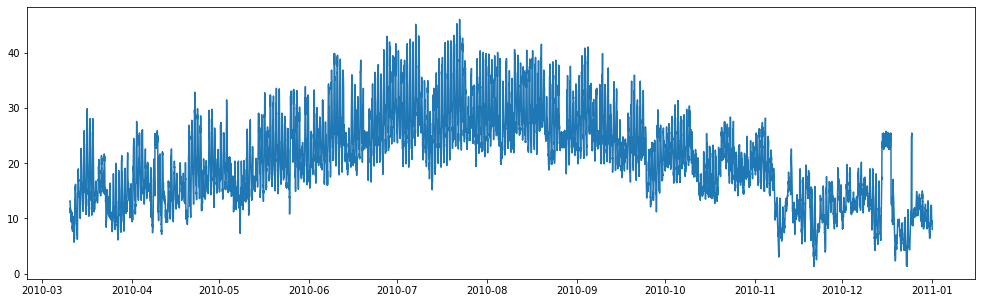

In [1035]:
plt.figure(1,(17,5))
plt.plot(train["deg_C"])

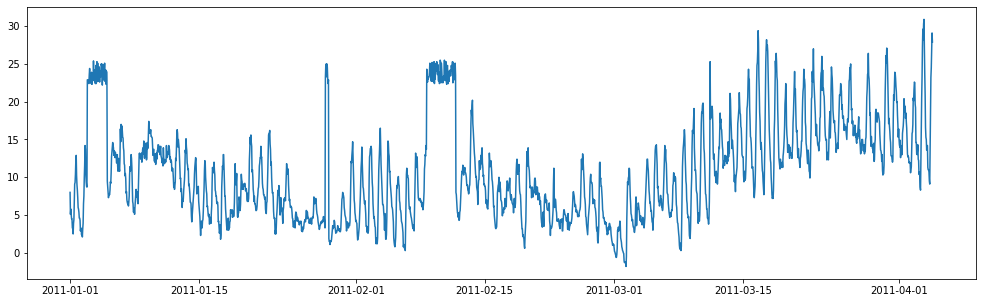

In [1036]:
plt.figure(1,(17,5))
plt.plot(test["deg_C"])

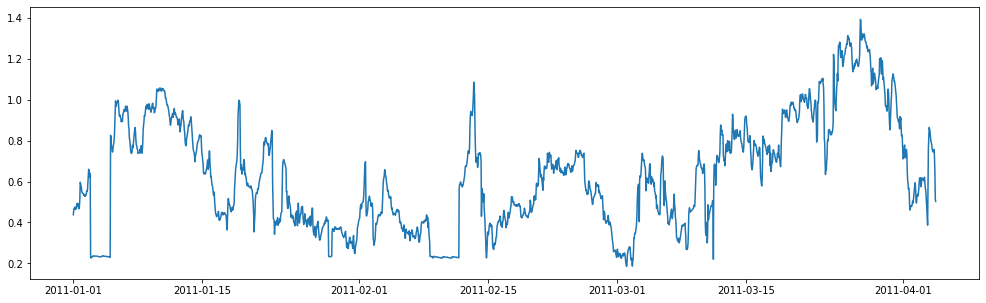

In [1039]:
plt.figure(1,(17,5))
plt.plot(test["absolute_humidity"])

In [1053]:
# There is evidence of some "Hot days"/"Heat-wave-like" in both training and (twice in) test set

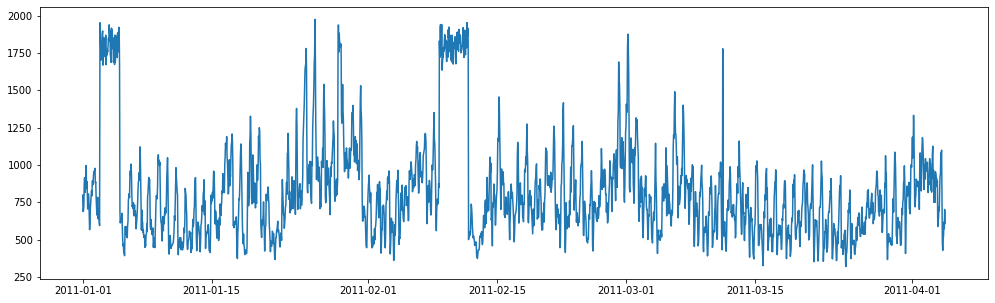

In [1050]:
plt.figure(1,(17,5))
plt.plot(test["sensor_3"])

# Lets try Rolling Means idea once again. Start with window=2 for 

In [1641]:
TREND_WINDOW = 2

In [1642]:
trend_train = train.drop(["day","month","hour","day_of_week"],axis=1).rolling(window=TREND_WINDOW).mean()
trend_train[["day","month","hour","day_of_week"]] = train[["day","month","hour","day_of_week"]]
trend_train.dropna(inplace=True)
trend_train

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-10 19:00:00  13.15              45.65            0.74165   1333.15   
2010-03-10 20:00:00  12.90              50.75            0.73785   1305.50   
2010-03-10 21:00:00  11.80              59.30            0.76845   1326.45   
2010-03-10 22:00:00  11.45              60.70            0.78775   1296.50   
2010-03-10 23:00:00  11.55              57.90            0.78680   1246.45   
...                    ...                ...                ...       ...   
2010-12-31 20:00:00   9.15              33.15            0.39145    979.20   
2010-12-31 21:00:00   9.15              32.60            0.38185   1011.60   
2010-12-31 22:00:00   9.35              33.90            0.40380   1033.55   
2010-12-31 23:00:00   8.80              37.65            0.41975    998.60   
2011-01-01 00:00:00   8.00              41.00            0.42300   1030.80   

                     sensor_2  sensor_3  sensor_4  sensor_5  sensor_3mod  \
date_time                                                                  
2010-03-10 19:00:00    988.00   1126.75   1596.35   1152.15     0.068225   
2010-03-10 20:00:00    908.90   1128.85   1518.00   1063.95     0.068147   
2010-03-10 21:00:00    929.30   1081.55   1561.30   1190.10     0.069648   
2010-03-10 22:00:00    890.85   1141.90   1476.00   1197.70     0.067633   
2010-03-10 23:00:00    775.10   1299.05   1439.05   1040.60     0.063369   
...                       ...       ...       ...       ...          ...   
2010-12-31 20:00:00    776.55    921.65    912.05    888.25     0.076441   
2010-12-31 21:00:00    800.60    912.30    910.95    906.95     0.076863   
2010-12-31 22:00:00    778.65    906.75    901.05   1031.25     0.077172   
2010-12-31 23:00:00    729.60    885.20    903.10   1182.70     0.078212   
2011-01-01 00:00:00    718.80    852.80    898.50   1239.70     0.080207   

                     sensor_1mod  sensor_2mod  sensor_4mod   sensor_5mod  day  \
date_time                                                                       
2010-03-10 19:00:00   540430.325   483304.040  1223430.925  29623.228169   10   
2010-03-10 20:00:00   498427.210   371187.700  1040961.610  25430.018847   10   
2010-03-10 21:00:00   527759.305   396018.580  1126972.730  31218.047717   10   
2010-03-10 22:00:00   485712.500   350559.145   956236.250  31564.689231   10   
2010-03-10 23:00:00   418550.405   231741.770   882369.505  24480.207323   10   
...                          ...          ...          ...           ...  ...   
2010-12-31 20:00:00   144246.330   228300.525   169794.505  18062.984827   31   
2010-12-31 21:00:00   169537.770   250712.720   168883.705  18796.939990   31   
2010-12-31 22:00:00   188083.325   229234.645   160981.525  24179.024947   31   
2010-12-31 23:00:00   160979.600   185977.450   162682.820  30812.387848   31   
2011-01-01 00:00:00   191672.640   176117.050   159144.500  33537.455942    1   

                     month  hour  day_of_week  
date_time                                      
2010-03-10 19:00:00      3    19            2  
2010-03-10 20:00:00      3    20            2  
2010-03-10 21:00:00      3    21            2  
2010-03-10 22:00:00      3    22            2  
2010-03-10 23:00:00      3    23            2  
...                    ...   ...          ...  
2010-12-31 20:00:00     12    20            4  
2010-12-31 21:00:00     12    21            4  
2010-12-31 22:00:00     12    22            4  
2010-12-31 23:00:00     12    23            4  
2011-01-01 00:00:00      1     0            5  

[7110 rows x 17 columns]

In [1643]:
residue_train = train - trend_train
residue_train[["day","month","hour","day_of_week"]] = train[["day","month","hour","day_of_week"]]
residue_train.dropna(inplace=True)
residue_train

absolute_humidity  day  day_of_week         deg_C  hour  \
date_time                                                                      
2010-03-10 19:00:00           -0.01615   10            2  5.000000e-02    19   
2010-03-10 20:00:00            0.01235   10            2 -3.000000e-01    20   
2010-03-10 21:00:00            0.01825   10            2 -8.000000e-01    21   
2010-03-10 22:00:00            0.00105   10            2  4.500000e-01    22   
2010-03-10 23:00:00           -0.00200   10            2 -3.500000e-01    23   
...                                ...  ...          ...           ...   ...   
2010-12-31 20:00:00           -0.00435   31            4  5.000000e-02    20   
2010-12-31 21:00:00           -0.00525   31            4 -5.000000e-02    21   
2010-12-31 22:00:00            0.02720   31            4  2.500000e-01    22   
2010-12-31 23:00:00           -0.01125   31            4 -8.000000e-01    23   
2011-01-01 00:00:00            0.01450    1            5 -5.329071e-15     0   

                     month  relative_humidity  sensor_1  sensor_1mod  \
date_time                                                              
2010-03-10 19:00:00      3              -0.35    -54.05   -79253.515   
2010-03-10 20:00:00      3               5.45     26.40    37250.400   
2010-03-10 21:00:00      3               3.10     -5.45    -7918.305   
2010-03-10 22:00:00      3              -1.70    -24.50   -34128.500   
2010-03-10 23:00:00      3              -1.10    -25.55   -33033.595   
...                    ...                ...       ...          ...   
2010-12-31 20:00:00     12              -1.15     21.30    16153.920   
2010-12-31 21:00:00     12               0.60     11.10     9137.520   
2010-12-31 22:00:00     12               0.70     10.85     9408.035   
2010-12-31 23:00:00     12               3.05    -45.80   -36511.760   
2011-01-01 00:00:00      1               0.30     78.00    67204.800   

                     sensor_2  sensor_2mod  sensor_3  sensor_3mod  sensor_4  \
date_time                                                                     
2010-03-10 19:00:00    -99.80  -137324.800     70.75    -0.002340   -146.45   
2010-03-10 20:00:00     20.70    25208.460    -68.65     0.002262     68.10   
2010-03-10 21:00:00     -0.30     -377.580     21.35    -0.000761    -24.80   
2010-03-10 22:00:00    -38.15   -45081.855     39.00    -0.001254    -60.50   
2010-03-10 23:00:00    -77.60   -73735.520    118.15    -0.003010     23.55   
...                       ...          ...       ...          ...       ...   
2010-12-31 20:00:00     34.65    33024.915    -48.65     0.002397     -3.05   
2010-12-31 21:00:00    -10.60   -10612.720     39.30    -0.001976      1.95   
2010-12-31 22:00:00    -11.35   -10865.355    -44.85     0.002285    -11.85   
2010-12-31 23:00:00    -37.70   -32391.840     23.30    -0.001246     13.90   
2011-01-01 00:00:00     26.90    22531.440    -55.70     0.003242    -18.50   

                     sensor_4mod  sensor_5  sensor_5mod  
date_time                                                
2010-03-10 19:00:00  -321120.915   -141.25 -6531.791683  
2010-03-10 20:00:00   138651.600     53.05  2338.582360  
2010-03-10 21:00:00   -52640.480     73.10  3449.446510  
2010-03-10 22:00:00  -118096.000    -65.50 -3102.804996  
2010-03-10 23:00:00    44229.255    -91.60 -3981.676912  
...                          ...       ...          ...  
2010-12-31 20:00:00    -2513.505     22.25   875.538944  
2010-12-31 21:00:00     1602.705     -3.55  -141.583781  
2010-12-31 22:00:00    -9504.885    127.85  5523.668737  
2010-12-31 23:00:00    11206.180     23.60  1109.694165  
2011-01-01 00:00:00   -14744.500     33.40  1615.373929  

[7110 rows x 17 columns]

In [1644]:
train.iloc[-1:,]

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
date_time                                                                     
2011-01-01    8.0               41.3             0.4375    1108.8     745.7   

            sensor_3  sensor_4  sensor_5  day  month  hour  sensor_3mod  \
date_time                                                                 
2011-01-01     797.1     880.0    1273.1    1      1     0     0.083449   

            sensor_1mod  sensor_2mod  sensor_4mod  sensor_5mod  day_of_week  
date_time                                                                    
2011-01-01    258877.44    198648.49     144400.0  35152.82987            5

In [1645]:
test.iloc[0:1,:]

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
date_time                                                                     
2011-01-01    8.0               41.3             0.4375    1108.8     745.7   

            sensor_3  sensor_4  sensor_5  day  month  hour  sensor_3mod  \
date_time                                                                 
2011-01-01     797.1     880.0    1273.1    1      1     0     0.083449   

            sensor_1mod  sensor_2mod  sensor_4mod  sensor_5mod  day_of_week  
date_time                                                                    
2011-01-01    258877.44    198648.49     144400.0  35152.82987            5

In [1646]:
# The Last row of training set is the same as the first row of testing set. 
# So:
#     1. we should copy over the targets results from training to test set
#     2. we should also copy over all the rolling mean parameters we devise!

In [1647]:
trend_targets = targets.rolling(window=TREND_WINDOW).mean()
trend_targets.dropna(inplace=True)
trend_targets

carbon  benzene  nitrogen
date_time                                     
2010-03-10 19:00:00    2.30    10.95    133.30
2010-03-10 20:00:00    2.15     9.55    113.00
2010-03-10 21:00:00    2.20     9.45    152.15
2010-03-10 22:00:00    1.85     8.05    149.50
2010-03-10 23:00:00    1.35     5.40    104.95
...                     ...      ...       ...
2010-12-31 20:00:00    1.25     5.00    201.05
2010-12-31 21:00:00    1.35     5.45    206.20
2010-12-31 22:00:00    1.50     5.50    224.35
2010-12-31 23:00:00    1.55     4.90    213.60
2011-01-01 00:00:00    1.45     4.35    193.15

[7110 rows x 3 columns]

In [1648]:
residue_targets = targets - targets.rolling(window=TREND_WINDOW).mean()
residue_targets.dropna(inplace=True)
residue_targets

carbon  benzene  nitrogen
date_time                                     
2010-03-10 19:00:00   -0.20    -1.05    -34.40
2010-03-10 20:00:00    0.05    -0.35     14.10
2010-03-10 21:00:00    0.00     0.25     25.05
2010-03-10 22:00:00   -0.35    -1.65    -27.70
2010-03-10 23:00:00   -0.15    -1.00    -16.85
...                     ...      ...       ...
2010-12-31 20:00:00    0.05     0.10     -9.95
2010-12-31 21:00:00    0.05     0.35     15.10
2010-12-31 22:00:00    0.10    -0.30      3.05
2010-12-31 23:00:00   -0.05    -0.30    -13.80
2011-01-01 00:00:00   -0.05    -0.25     -6.65

[7110 rows x 3 columns]

### Fresh CV

In [1248]:
# X_train, X_val, y_train, y_val = train_test_split(trend_train.dropna(),, test_size=0.2, random_state=2003)


### Ideally you should have a CV that sets apart a small time period away

## Trend Model

In [1249]:
mod_trend = LinearRegression().fit(X_train, y_train)

In [1250]:
mod_trend.score(X_train, y_train), mod_trend.score(X_val, y_val)

(0.8485360228776725, 0.83240017821102)

In [1258]:
pred_train = mod_trend.predict(X_train)
pred_train = np.where(pred_train<0, Tmeans, pred_train)

In [1259]:
pred_val= mod_trend.predict(X_val)
pred_val = np.where(pred_val<0, Tmeans, pred_val)

In [1260]:
print(np.sqrt(mean_squared_log_error(y_train, pred_train, multioutput="raw_values")))
print(np.sqrt(mean_squared_log_error(y_val, pred_val, multioutput="raw_values")))

[7.39 7.6  9.22]
[7.4  7.61 9.21]


## Residual Model

In [1649]:
TEST_FRACTION = 0.2
RAND_STATE    = 2003

X_train, X_val, y_train, y_val   = train_test_split(residue_train, residue_targets, test_size=TEST_FRACTION, random_state=RAND_STATE)
# Tr_targets_train, Tr_targets_val = train_test_split(trend_targets, test_size=TEST_FRACTION, random_state=RAND_STATE)
idx_train, idx_val = train_test_split(residue_train.index, test_size=TEST_FRACTION, random_state=RAND_STATE)


In [1650]:
resid_trend = LinearRegression().fit(X_train, y_train)

In [1651]:
resid_trend.score(X_train, y_train), resid_trend.score(X_val, y_val)

(0.7435244578377102, 0.7326838390477084)

In [1652]:
pred_train = resid_trend.predict(X_train) + trend_targets.loc[idx_train]
pred_train = np.where(pred_train<0, trend_targets.loc[idx_train], pred_train)

In [1653]:
pred_val = resid_trend.predict(X_val) + trend_targets.loc[idx_val]
pred_val = np.where(pred_val<0, trend_targets.loc[idx_val], pred_val)

In [1654]:
rmsle_train = np.sqrt(mean_squared_log_error(targets.loc[idx_train], pred_train, multioutput="raw_values"))
rmsle_val   = np.sqrt(mean_squared_log_error(targets.loc[idx_val], pred_val, multioutput="raw_values"))
print("WINDOW SIZE =", TREND_WINDOW)
print(rmsle_train)
print(rmsle_val)
print(rmsle_train.mean())
print(rmsle_val.mean())

WINDOW SIZE = 2
[0.06 0.07 0.18]
[0.06 0.09 0.16]
0.10252786897190103
0.10236064071726743


In [1655]:
rmsle_train = np.sqrt(mean_squared_log_error(targets.loc[idx_train], pred_train, multioutput="raw_values"))
rmsle_val   = np.sqrt(mean_squared_log_error(targets.loc[idx_val], pred_val, multioutput="raw_values"))
print(rmsle_train)
print(rmsle_val)
print(rmsle_train.mean())
print(rmsle_val.mean())

[0.06 0.07 0.18]
[0.06 0.09 0.16]
0.10252786897190103
0.10236064071726743


### Lets now try to predict the test set. First we replicate the preparation steps.

In [1366]:
# TREND_WINDOW = 2

In [ ]:
# test = test.reindex(columns=train.columns)   # in case of some misalignments in column order from experimentation

In [1418]:
trend_test = test.drop(["day","month","hour","day_of_week"],axis=1).rolling(window=TREND_WINDOW).mean()
trend_test[["day","month","hour","day_of_week"]] = test[["day","month","hour","day_of_week"]]
trend_test = trend_test.reindex(columns=trend_train.columns)
trend_test.iloc[0:1] = trend_train.iloc[-1:, :]
trend_test

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2011-01-01 00:00:00   8.00              41.00            0.42300   1030.80   
2011-01-01 01:00:00   6.55              46.50            0.44695   1179.15   
2011-01-01 02:00:00   5.45              51.60            0.46265   1176.05   
2011-01-01 03:00:00   5.40              51.90            0.46910   1121.15   
2011-01-01 04:00:00   4.75              54.90            0.46715   1081.05   
...                    ...                ...                ...       ...   
2011-04-04 10:00:00  21.05              33.25            0.75275   1312.15   
2011-04-04 11:00:00  23.85              25.60            0.73435   1286.55   
2011-04-04 12:00:00  25.55              20.75            0.67625   1210.25   
2011-04-04 13:00:00  27.85              15.85            0.57725   1120.45   
2011-04-04 14:00:00  28.50              13.10            0.50835   1088.90   

                     sensor_2  sensor_3  sensor_4  sensor_5  sensor_3mod  \
date_time                                                                  
2011-01-01 00:00:00    718.80    852.80    898.50   1239.70     0.080207   
2011-01-01 01:00:00    805.30    742.50    926.40   1493.55     0.087801   
2011-01-01 02:00:00    871.45    690.80    957.35   1507.40     0.091881   
2011-01-01 03:00:00    897.10    709.65    976.45   1291.90     0.090203   
2011-01-01 04:00:00    877.35    798.55    989.00   1212.65     0.083859   
...                       ...       ...       ...       ...          ...   
2011-04-04 10:00:00   1062.95    512.35   1360.75   1613.50     0.117348   
2011-04-04 11:00:00    989.50    569.45   1300.05   1464.40     0.107526   
2011-04-04 12:00:00   1003.75    594.45   1239.75   1175.05     0.103052   
2011-04-04 13:00:00   1030.70    637.40   1131.60    944.80     0.098467   
2011-04-04 14:00:00   1043.70    655.10   1035.55    812.25     0.095940   

                     sensor_1mod  sensor_2mod  sensor_4mod   sensor_5mod  day  \
date_time                                                                       
2011-01-01 00:00:00   191672.640   176117.050   159144.500  33537.455942    1   
2011-01-01 01:00:00   340363.845   258880.250   183969.920  47031.400693    1   
2011-01-01 02:00:00   337228.505   326598.005   209407.725  47716.325471    1   
2011-01-01 03:00:00   271941.425   356893.220   228198.305  36081.544447    1   
2011-01-01 04:00:00   234848.925   334842.345   239605.000  32283.051704    1   
...                          ...          ...          ...           ...  ...   
2011-04-04 10:00:00   507950.045   583617.605   741066.125  53164.095962    4   
2011-04-04 11:00:00   474239.965   476593.610   645548.605  45363.309271    4   
2011-04-04 12:00:00   372913.565   497630.885   547416.385  30552.770171    4   
2011-04-04 13:00:00   275390.765   534393.380   413753.800  20582.166388    4   
2011-04-04 14:00:00   240297.700   554293.780   287476.865  15149.534915    4   

                     month  hour  day_of_week  
date_time                                      
2011-01-01 00:00:00      1     0            5  
2011-01-01 01:00:00      1     1            5  
2011-01-01 02:00:00      1     2            5  
2011-01-01 03:00:00      1     3            5  
2011-01-01 04:00:00      1     4            5  
...                    ...   ...          ...  
2011-04-04 10:00:00      4    10            0  
2011-04-04 11:00:00      4    11            0  
2011-04-04 12:00:00      4    12            0  
2011-04-04 13:00:00      4    13            0  
2011-04-04 14:00:00      4    14            0  

[2247 rows x 17 columns]

In [1420]:
residue_test = test - trend_test
residue_test[["day","month","hour","day_of_week"]] = test[["day","month","hour","day_of_week"]]
residue_test

absolute_humidity  day  day_of_week         deg_C  hour  \
date_time                                                                      
2011-01-01 00:00:00            0.01450    1            5 -5.329071e-15     0   
2011-01-01 01:00:00            0.00945    1            5 -1.450000e+00     1   
2011-01-01 02:00:00            0.00625    1            5  3.500000e-01     2   
2011-01-01 03:00:00            0.00020    1            5 -4.000000e-01     3   
2011-01-01 04:00:00           -0.00215    1            5 -2.500000e-01     4   
...                                ...  ...          ...           ...   ...   
2011-04-04 10:00:00            0.00405    4            0  2.150000e+00    10   
2011-04-04 11:00:00           -0.02245    4            0  6.500000e-01    11   
2011-04-04 12:00:00           -0.03565    4            0  1.050000e+00    12   
2011-04-04 13:00:00           -0.06335    4            0  1.250000e+00    13   
2011-04-04 14:00:00           -0.00555    4            0 -6.000000e-01    14   

                     month  relative_humidity  sensor_1  sensor_1mod  \
date_time                                                              
2011-01-01 00:00:00      1               0.30     78.00    67204.800   
2011-01-01 01:00:00      1               5.20     70.35    81486.405   
2011-01-01 02:00:00      1              -0.10    -73.45   -84621.745   
2011-01-01 03:00:00      1               0.40     18.55    19334.665   
2011-01-01 04:00:00      1               2.60    -58.65   -56427.165   
...                    ...                ...       ...          ...   
2011-04-04 10:00:00      4              -4.55     28.15    40094.045   
2011-04-04 11:00:00      4              -3.10    -53.75   -73804.125   
2011-04-04 12:00:00      4              -1.75    -22.55   -27522.275   
2011-04-04 13:00:00      4              -3.15    -67.25   -70000.525   
2011-04-04 14:00:00      4               0.40     35.70    34907.460   

                     sensor_2  sensor_2mod  sensor_3  sensor_3mod  sensor_4  \
date_time                                                                     
2011-01-01 00:00:00     26.90    22531.440    -55.70     0.003242    -18.50   
2011-01-01 01:00:00     59.60    60231.760    -54.60     0.004352     46.40   
2011-01-01 02:00:00      6.55     7485.995      2.90    -0.000273    -15.45   
2011-01-01 03:00:00     19.10    22809.220     15.95    -0.001405     34.55   
2011-01-01 04:00:00    -38.85   -44860.095     72.95    -0.004938    -22.00   
...                       ...          ...       ...          ...       ...   
2011-04-04 10:00:00    -39.05   -59586.395     10.45    -0.002311     13.25   
2011-04-04 11:00:00    -34.40   -47437.600     46.65    -0.007510    -73.95   
2011-04-04 12:00:00     48.65    68474.875    -21.65     0.003035     13.65   
2011-04-04 13:00:00    -21.70   -31712.380     64.60    -0.007620   -121.80   
2011-04-04 14:00:00     34.70    51612.780    -46.90     0.005094     25.75   

                     sensor_4mod  sensor_5   sensor_5mod  
date_time                                                 
2011-01-01 00:00:00   -14744.500     33.40   1615.373929  
2011-01-01 01:00:00    39569.920    220.45  11878.570823  
2011-01-01 02:00:00   -14132.115   -206.60 -11193.646045  
2011-01-01 03:00:00    32922.695     -8.90   -441.134980  
2011-01-01 04:00:00   -21516.000    -70.35  -3357.357763  
...                          ...       ...           ...  
2011-04-04 10:00:00    22809.875     46.30   2610.963117  
2011-04-04 11:00:00  -118327.395   -195.40 -10411.749807  
2011-04-04 12:00:00    20195.175    -93.95  -4398.789294  
2011-04-04 13:00:00  -153857.760   -136.30  -5571.814489  
2011-04-04 14:00:00    27580.825      3.75    139.183017  

[2247 rows x 17 columns]

In [1618]:
shape_result = (test.shape[0], targets.shape[1])
test_result = pd.DataFrame(np.zeros(shape_result), columns=targets.columns, index=test.index)

In [1619]:
test_result.iloc[0:1] = targets.iloc[-1:]

In [1620]:
# test_result[["carbon_delta", "benzene_delta", "nitrogen_delta"]] = pd.DataFrame(resid_trend.predict(residue_test),index=test_result.index)


In [1621]:
test_result.iloc[1:,:] = pd.DataFrame(resid_trend.predict(residue_test)[1:],index=test_result.index[1:])
test_result

carbon   benzene    nitrogen
date_time                                          
2011-01-01 00:00:00  1.400000  4.100000  186.500000
2011-01-01 01:00:00  0.375759  1.866570   56.161376
2011-01-01 02:00:00 -0.290435 -1.071941  -36.456942
2011-01-01 03:00:00  0.033867  0.248451    9.025795
2011-01-01 04:00:00 -0.226835 -1.220300  -23.754736
...                       ...       ...         ...
2011-04-04 10:00:00  0.023126 -0.098525    1.533252
2011-04-04 11:00:00 -0.381633 -1.864002  -49.914350
2011-04-04 12:00:00  0.027174  0.397990    1.905692
2011-04-04 13:00:00 -0.299247 -1.582983  -42.528377
2011-04-04 14:00:00  0.158751  0.904798   19.425818

[2247 rows x 3 columns]

In [1622]:
for idx in range(1, test_result.shape[0]):
    a = test_result.iloc[(idx-TREND_WINDOW+1):(idx+1)].sum()/(TREND_WINDOW-1)
    b = test_result.iloc[idx]
#     print(a.values, b.values, a.values+b.values)
    c = a.values+b.values
    c = np.where(c<0, a , c)
    test_result.iloc[idx] = c
    

In [1623]:
test_result

carbon    benzene    nitrogen
date_time                                           
2011-01-01 00:00:00  1.400000   4.100000  186.500000
2011-01-01 01:00:00  2.151518   7.833140  298.822752
2011-01-01 02:00:00  1.570648   5.689259  225.908868
2011-01-01 03:00:00  1.638381   6.186162  243.960458
2011-01-01 04:00:00  1.184711   3.745561  196.450986
...                       ...        ...         ...
2011-04-04 10:00:00  6.672911  16.659519  402.447628
2011-04-04 11:00:00  5.909645  12.931515  302.618927
2011-04-04 12:00:00  5.963994  13.727494  306.430310
2011-04-04 13:00:00  5.365500  10.561528  221.373556
2011-04-04 14:00:00  5.683001  12.371123  260.225192

[2247 rows x 3 columns]

<AxesSubplot:xlabel='date_time'>

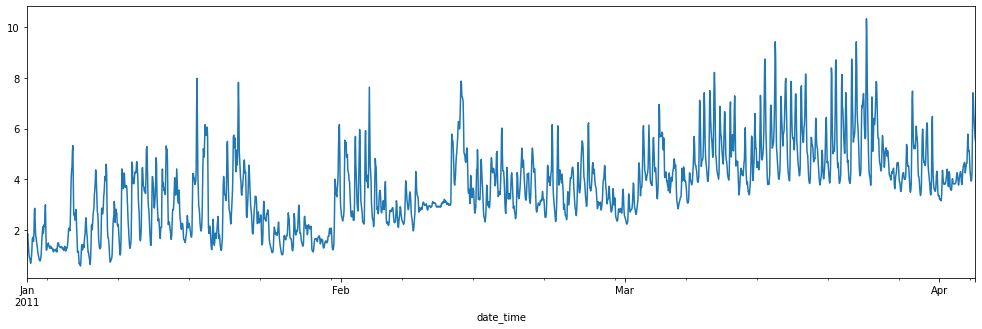

In [1617]:
plt.figure(1,(17,5))
test_result["carbon"].rolling(2).mean().plot()

<AxesSubplot:xlabel='date_time'>

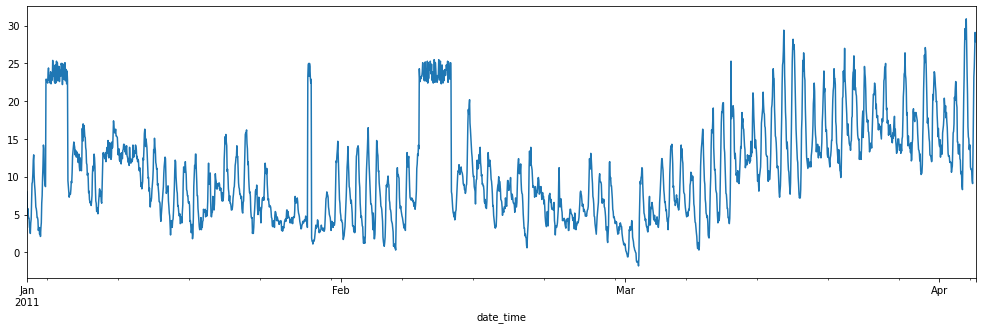

In [1602]:
plt.figure(1,(17,5))
test["deg_C"].plot()

<AxesSubplot:xlabel='date_time'>

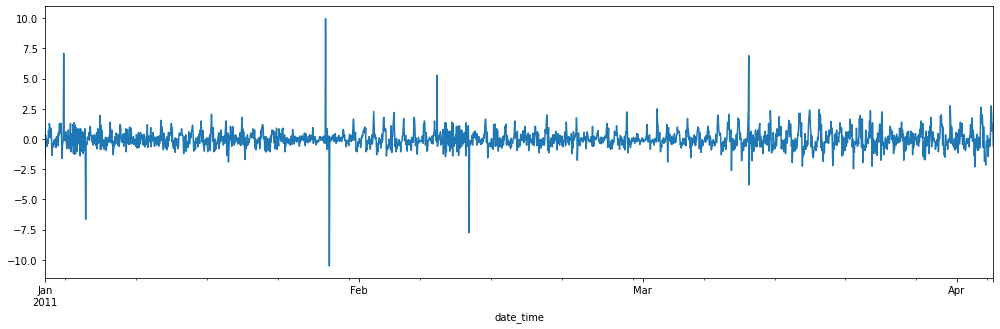

In [1606]:
plt.figure(1,(17,5))
residue_test["deg_C"].plot()

In [1616]:
residue_test[residue_test["deg_C"].abs()>3.5]

absolute_humidity  day  day_of_week  deg_C  hour  month  \
date_time                                                                      
2011-01-02 21:00:00           -0.20590    2            6   7.10    21      1   
2011-01-05 01:00:00            0.29850    5            2  -6.65     1      1   
2011-01-28 17:00:00           -0.08280   28            4   9.95    17      1   
2011-01-29 02:00:00            0.05850   29            5 -10.50     2      1   
2011-02-08 17:00:00           -0.03760    8            1   5.30    17      2   
2011-02-11 21:00:00            0.16965   11            4  -7.75    21      2   
2011-03-11 11:00:00           -0.14320   11            4   6.90    11      3   
2011-03-11 12:00:00            0.18735   11            4  -3.80    12      3   

                     relative_humidity  sensor_1  sensor_1mod  sensor_2  \
date_time                                                                 
2011-01-02 21:00:00             -10.45   -120.40  -147634.480   -322.85   
2011-01-05 01:00:00              19.30     19.70    20751.980    180.30   
2011-01-28 17:00:00              -8.65     96.95    73497.795   -139.45   
2011-01-29 02:00:00               5.00   -122.30   -88765.340     38.80   
2011-02-08 17:00:00               6.25    132.40   115638.160   -165.10   
2011-02-11 21:00:00               8.15    143.00   200772.000    434.75   
2011-03-11 11:00:00              -3.55    -70.25   -92708.925   -425.60   
2011-03-11 12:00:00              -1.30    -35.40   -39237.360    298.70   

                     sensor_2mod  sensor_3  sensor_3mod  sensor_4  \
date_time                                                           
2011-01-02 21:00:00  -255794.055    679.40    -0.025701   -325.95   
2011-01-05 01:00:00    95270.520   -484.00     0.018325    287.55   
2011-01-28 17:00:00   -70408.305    422.20    -0.011613   -108.25   
2011-01-29 02:00:00    11702.080   -238.70     0.004395     43.70   
2011-02-08 17:00:00   -78785.720    490.85    -0.013509   -108.85   
2011-02-11 21:00:00   438532.325   -661.70     0.033420    356.90   
2011-03-11 11:00:00  -448412.160    633.20    -0.031692   -393.80   
2011-03-11 12:00:00   238900.260   -598.75     0.025446    274.10   

                     sensor_4mod  sensor_5   sensor_5mod  
date_time                                                 
2011-01-02 21:00:00  -277285.665   -601.50 -29842.342526  
2011-01-05 01:00:00   233404.335    165.00   6925.985763  
2011-01-28 17:00:00   -50780.075     22.20    674.355692  
2011-01-29 02:00:00    13031.340   -163.15  -4512.458222  
2011-02-08 17:00:00   -41613.355     29.80    896.361378  
2011-02-11 21:00:00   357685.180    715.35  36993.313732  
2011-03-11 11:00:00  -408921.920   -543.05 -25369.716996  
2011-03-11 12:00:00   219005.900    352.10  14861.827998

<AxesSubplot:xlabel='date_time'>

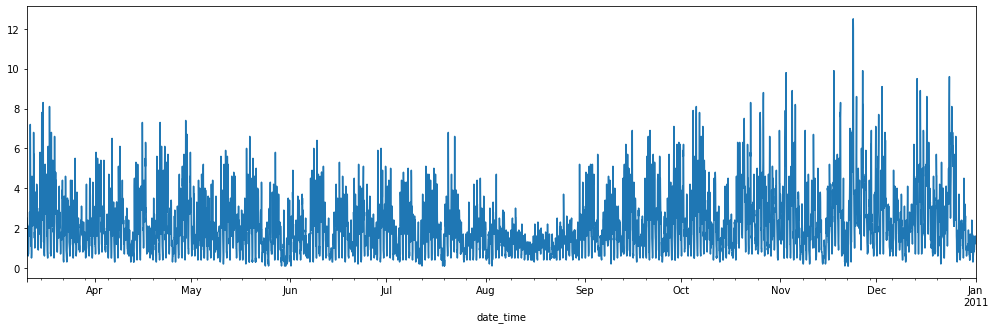

In [1596]:
plt.figure(1,(17,5))
targets["carbon"].plot()

<AxesSubplot:xlabel='date_time'>

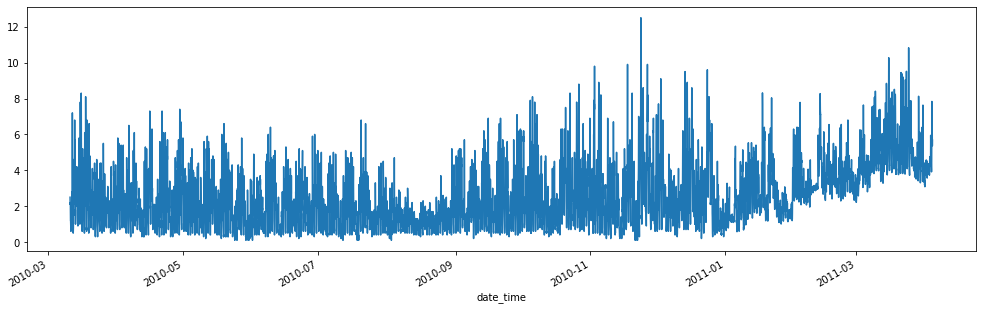

In [1594]:
plt.figure(1,(17,5))
pd.concat([targets["carbon"],test_result["carbon"]]).plot()

In [ ]:
This error could have also been captured if you paid attention to cross-validation!
instead of random sampling, allocate a time interval for the validation. 

In [ ]:
Try isolating the hot day occurence in training set as well

In [1600]:
test_result.reset_index()

date_time    carbon    benzene    nitrogen
0    2011-01-01 00:00:00  1.400000   4.100000  186.500000
1    2011-01-01 01:00:00  2.151518   7.833140  298.822752
2    2011-01-01 02:00:00  1.570648   5.689259  225.908868
3    2011-01-01 03:00:00  1.638381   6.186162  243.960458
4    2011-01-01 04:00:00  1.184711   3.745561  196.450986
...                  ...       ...        ...         ...
2242 2011-04-04 10:00:00  6.672911  16.429359  406.501637
2243 2011-04-04 11:00:00  5.909645  12.701355  306.672936
2244 2011-04-04 12:00:00  5.963994  13.497334  310.484319
2245 2011-04-04 13:00:00  5.365500  10.331368  225.427565
2246 2011-04-04 14:00:00  5.683001  12.140963  264.279201

[2247 rows x 4 columns]

In [1601]:
col_headers = ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
result = test_result.reset_index()
result.columns = col_headers
result.to_csv("submissions/4_own_timeseries_decomp_recomb.csv", header=True, index=False)
result

date_time  target_carbon_monoxide  target_benzene  \
0    2011-01-01 00:00:00                1.400000        4.100000   
1    2011-01-01 01:00:00                2.151518        7.833140   
2    2011-01-01 02:00:00                1.570648        5.689259   
3    2011-01-01 03:00:00                1.638381        6.186162   
4    2011-01-01 04:00:00                1.184711        3.745561   
...                  ...                     ...             ...   
2242 2011-04-04 10:00:00                6.672911       16.429359   
2243 2011-04-04 11:00:00                5.909645       12.701355   
2244 2011-04-04 12:00:00                5.963994       13.497334   
2245 2011-04-04 13:00:00                5.365500       10.331368   
2246 2011-04-04 14:00:00                5.683001       12.140963   

      target_nitrogen_oxides  
0                 186.500000  
1                 298.822752  
2                 225.908868  
3                 243.960458  
4                 196.450986  
...                      ...  
2242              406.501637  
2243              306.672936  
2244              310.484319  
2245              225.427565  
2246              264.279201  

[2247 rows x 4 columns]

In [1624]:
col_headers = ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
result_2 = test_result.reset_index()
result_2.columns = col_headers
result_2.to_csv("submissions/4_own_timeseries_decomp_recomb_v2.csv", header=True, index=False)
result_2

date_time  target_carbon_monoxide  target_benzene  \
0    2011-01-01 00:00:00                1.400000        4.100000   
1    2011-01-01 01:00:00                2.151518        7.833140   
2    2011-01-01 02:00:00                1.570648        5.689259   
3    2011-01-01 03:00:00                1.638381        6.186162   
4    2011-01-01 04:00:00                1.184711        3.745561   
...                  ...                     ...             ...   
2242 2011-04-04 10:00:00                6.672911       16.659519   
2243 2011-04-04 11:00:00                5.909645       12.931515   
2244 2011-04-04 12:00:00                5.963994       13.727494   
2245 2011-04-04 13:00:00                5.365500       10.561528   
2246 2011-04-04 14:00:00                5.683001       12.371123   

      target_nitrogen_oxides  
0                 186.500000  
1                 298.822752  
2                 225.908868  
3                 243.960458  
4                 196.450986  
...                      ...  
2242              402.447628  
2243              302.618927  
2244              306.430310  
2245              221.373556  
2246              260.225192  

[2247 rows x 4 columns]